In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from statannot import add_stat_annotation
import seaborn as sns
import os
from Bio import SeqIO
import pickle
import json
import requests
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from numpy import arange
from sklearn.model_selection import cross_val_score
from scipy.special import softmax
import torch
from scipy.stats import ttest_ind

### Load protein sequences

In [20]:
#### load +Droplet drivers ####


with open('final_files/gr_uniprot_id_d_404', 'rb') as fp:
                        gr_uniprot_id_d_404 = pickle.load(fp)
with open('final_files/gr_protein_seq_d_404', 'rb') as fp:
                        gr_protein_seq_d_404 = pickle.load(fp)
        
## +Droplet driver features

## iupred3 disorder score
with open('final_files/disorder_d_404', 'rb') as fp:
                        disorder_d_404= pickle.load(fp)
        

## gyration radious
with open('final_files/droplet_driver_r_g_d_404', 'rb') as fp:
                       droplet_driver_r_g_d_404 = pickle.load(fp)

In [3]:
## load +Amyloids

with open('final_files/gr_uniprot_id_a_113', 'rb') as fp:
                        gr_uniprot_id_a_113 = pickle.load(fp)
with open('final_files/gr_protein_seq_a_113', 'rb') as fp:
                        gr_protein_seq_a_113 = pickle.load(fp)
## +Amyloid features

## iupred3 disorder score
with open('final_files/disorder_a_113', 'rb') as fp:
                        disorder_a_113 = pickle.load(fp)

## gyration radious
with open('final_files/amyloid_r_g_a_113', 'rb') as fp:
                       amyloid_r_g_a_113 = pickle.load(fp)       

In [4]:
## load -PT

with open('final_files/gr_uniprot_id_pdb_360', 'rb') as fp:
                        gr_uniprot_id_pdb_360 = pickle.load(fp)
with open('final_files/gr_protein_seq_pdb_360', 'rb') as fp:
                        gr_protein_seq_pdb_360 = pickle.load(fp)
        
## iupred3 disorder score
with open('final_files/disorder_s_360', 'rb') as fp:
                       disorder_s_360 = pickle.load(fp)

## gyration radious       
with open('final_files/pdb_r_g_s_360', 'rb') as fp:
                       pdb_r_g_s_360 = pickle.load(fp)

In [5]:
## Load AD - this is for 122 AMP-AD sequences

with open('final_files/gr_uniprot_id_AD', 'rb') as fp:
                        gr_uniprot_id_AD = pickle.load(fp)
        
with open('final_files/gr_seq_AD', 'rb') as fp:
                        gr_seq_AD = pickle.load(fp)
        
## iupred3 disorder score
with open('final_files/disorder_AD', 'rb') as fp:
                       disorder_AD = pickle.load(fp)
        
## gyration radious      
with open('final_files/r_g_AD', 'rb') as fp:
                       r_g_AD = pickle.load(fp)

In [6]:
## Load AD - this is for 190 AMP-AD (122 + 68 new) it is 176 pdb files extracted from alphaFold database and 
## 176+14 = 190 alphaFold + running the ESMFold 

with open('final_files/gr_uniprot_id_AD_alpha', 'rb') as fp:
                        gr_uniprot_id_AD_alpha = pickle.load(fp)

#with open('final_files/gr_uniprot_id_AD_ESM', 'rb') as fp:   #not work
                        #gr_uniprot_id_AD_ESM = pickle.load(fp)
        
        
        
with open('final_files/protein_seq_AD_alpha', 'rb') as fp:
                        protein_seq_AD_alpha = pickle.load(fp)
        
with open('final_files/AD_esm_uniprots_not_in_alpha_seq', 'rb') as fp:
                        AD_esm_uniprots_not_in_alpha_seq = pickle.load(fp)        
        

alpha_ESM_seq = protein_seq_AD_alpha + AD_esm_uniprots_not_in_alpha_seq 

## iupred3 disorder score
#with open('final_files/disorder_AD_alpha', 'rb') as fp:
                       #disorder_AD_alpha = pickle.load(fp)
with open('final_files/disorder_AD_alpha_ESM', 'rb') as fp:
                       disorder_AD_alpha_ESM = pickle.load(fp)
        
## gyration radious        
with open('final_files/r_g_AD_alpha', 'rb') as fp:
                       r_g_AD_alpha = pickle.load(fp)
with open('final_files/r_g_AD_ESM', 'rb') as fp:
                       r_g_AD_ESM = pickle.load(fp)

alpha_ESM_AD_gr = r_g_AD_alpha + r_g_AD_ESM 

In [7]:
## Uniprot ID of proteins extracted both from alphaFold database and by running the ESMFold model
gr_uniprot_id_AD_ESM =['A0A8Q3WKU2',
 'A0A3B3IRL6',
 'I3L0L1',
 'H7BZ76',
 'A0A8V8TLB5',
 'A0A087WZ63',
 'A0A494C1G2',
 'A0A8V8TLQ6',
 'H0YLC1',
 'A0A8Q3WL64',
 'J3QR64',
 'K7ERL3',
 'K7EKG4',
 'A0A087WZ24']
alpha_ESM_uniprot_AD = gr_uniprot_id_AD_alpha + gr_uniprot_id_AD_ESM

In [8]:
## Load indexes of AMD-AD sequences that were predicted as droplets+amyloids
with open('final_files/alpha_ESM_seq_AD_das_0_indexes', 'rb') as fp:
                        alpha_ESM_seq_AD_das_0_indexes = pickle.load(fp)

In [9]:
### load tau and beta amyloid precursor

with open('final_files/tau_seq_758', 'rb') as fp:
                       tau_758 = pickle.load(fp)
           
with open('final_files/amyloid_beta_precursor', 'rb') as fp:
                       amyloid_beta_precursor = pickle.load(fp)

# gyration radious
with open('final_files/gr_amyloid_beta_precursor_tau', 'rb') as fp:
                       gr_amyloid_beta_precursor_tau = pickle.load(fp)
gr_amyloid_beta_precursor_tau

{'P05067': 38.913012388503724, 'P10636': 63.909917350282655}

In [10]:
### ab42 mutation table

ab42_mut_table = pd.read_csv('mutated_protein_Sheet1.csv')
ab42_mut_names = ab42_mut_table.columns.tolist()[1:]


#print(AB42_mut[671:713])

ab42_mut_list = []
for i in range(1, ab42_mut_table.shape[1]):
    s = ''.join(str(x) for x in ab42_mut_table.iloc[:,i].values.tolist())
    s = s
    ab42_mut_list.append(s)
x = ab42_mut_list

### Computing sequence length & biophysical features

In [21]:
def statistics(df3, y_title):
    "input: DataFrame of high and low protein phase transition features"
    "output: boxplots of the features in +droplet drivers / +Amyloids / AMP-AD / -PT"
    
    plt.rcParams['svg.fonttype']='none'
    
    sns.set(style="whitegrid")
    #x = "LLPS_Propensity"
    #y = "b_sheet_propensity"
    order = ['+Droplet drivers', '+Amyloids', 'AMP-AD','-PT']
    
    fig, (ax1) = plt.subplots(1)
    plt.setp(ax1.spines.values(), color='black')
    
    ax = sns.boxplot(data=df3, showmeans=False, order=order, showfliers = True, palette="vlag")
    add_stat_annotation(ax, data=df3, order=order,
                box_pairs=[('+Droplet drivers', '+Amyloids'),('+Droplet drivers', '-PT'), 
                           ('+Amyloids', '-PT'), 
                           ('+Droplet drivers', 'AMP-AD'),('+Amyloids','AMP-AD'), ('-PT', 'AMP-AD')],
                test='t-test_welch', text_format='star', loc='outside', verbose=2, fontsize=16)
    
    
    plt.ylabel(f'{y_title}', fontsize=14)
    plt.xticks(fontsize=14, rotation=22)
    plt.yticks(fontsize=14)
    plt.grid(False)
    
    return

113
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

+Droplet drivers v.s. +Amyloids: Welch's t-test independent samples with Bonferroni correction, P_val=8.048e-14 stat=8.224e+00
+Amyloids v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.029e+00
AMP-AD v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=1.098e-12 stat=7.903e+00
+Amyloids v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=1.295e-07 stat=6.008e+00
+Droplet drivers v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=5.045e-12 stat=7.393e+00
+Droplet drivers v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=7.707e-74 stat=2.234e+01


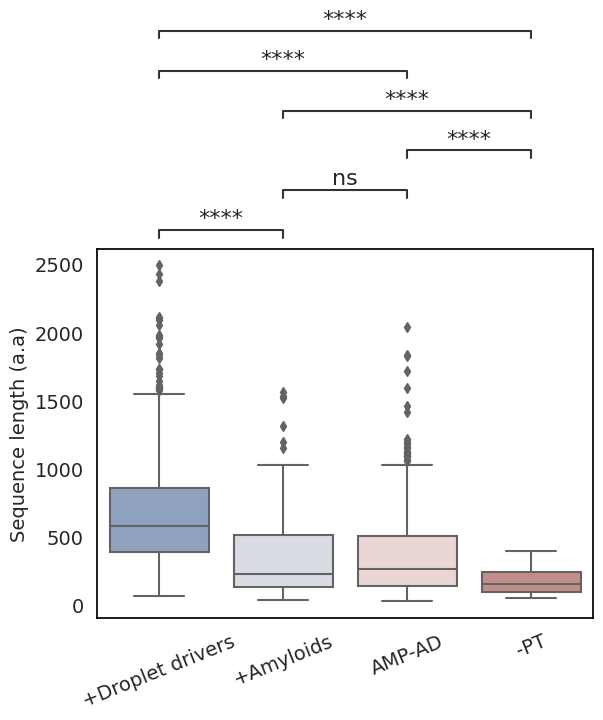

In [22]:
## plot protein sequence length distribution

#-PT 
d = {'len_s': [len(i) for i in gr_protein_seq_pdb_360]}
df_len_s = pd.DataFrame(data=d)


#droplets
d = {'len_d': [len(i) for i in gr_protein_seq_d_404]}
df_len_d = pd.DataFrame(data=d)

#amyloids
d = {'len_a': [len(i) for i in gr_protein_seq_a_113]}
df_len_a = pd.DataFrame(data=d)
print(len(df_len_a))

#AD
d = {'len_AD': [len(i) for i in (alpha_ESM_seq[0:183]+alpha_ESM_seq[184:])]}
df_len_AD = pd.DataFrame(data=d)


df_len_s.rename(columns = {'len_s':'-PT'}, inplace=True)
df_len_d.rename(columns = {'len_d':'+Droplet drivers'}, inplace=True)
#df_dis_da.rename(columns = {'dis_da':'droplets and amyloids'}, inplace=True)
df_len_a.rename(columns = {'len_a':'+Amyloids'}, inplace=True)
df_len_AD.rename(columns = {'len_AD':'AMP-AD'}, inplace=True)

all_arr = pd.concat([df_len_d['+Droplet drivers'],df_len_a['+Amyloids'], 
                     df_len_s['-PT'],df_len_AD['AMP-AD'] ], axis=1)

statistics(all_arr, 'Sequence length (a.a)')

#### Feature exploration: examples that are found not significance

In [23]:
def phos_percentage(seq):

    phos= []
    phos_pecentage = []
    

    for l in seq:
        if ((l=='S')| (l=='T')| (l=='Y')):
            phos.append(1)
    
    phos_pecentage.append(100*np.sum(phos)/len(seq))
    return phos_pecentage

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

+Droplet drivers v.s. +Amyloids: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.226e+00
+Amyloids v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.745e-01
AMP-AD v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=1.240e-09 stat=6.530e+00
+Amyloids v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=6.062e-06 stat=5.088e+00
+Droplet drivers v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=4.762e-02 stat=2.668e+00
+Droplet drivers v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=7.692e-25 stat=1.085e+01


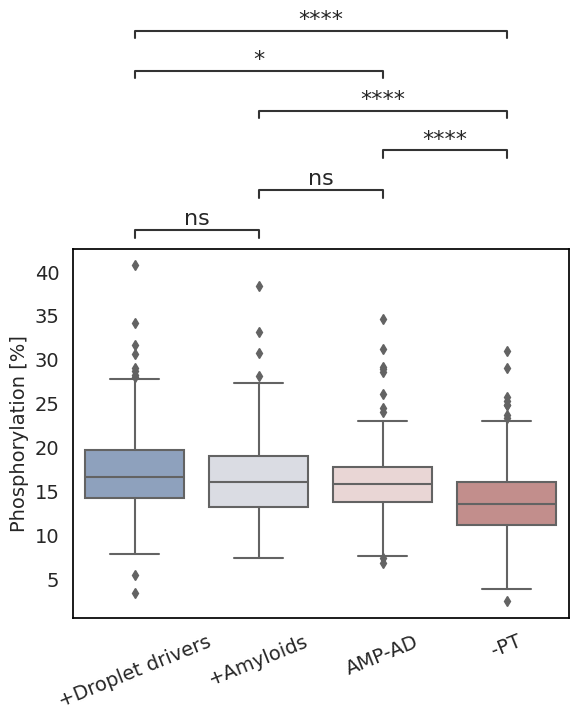

In [26]:
phos_pt = []
phos_amyloid = []
phos_droplet = []
phos_AMP_AD = []

for i in gr_protein_seq_pdb_360:
    phos_pt.append(phos_percentage(i))
    phos_pt_list = [i[0]for i in phos_pt]
    
for i in gr_protein_seq_a_113:
    phos_amyloid.append(phos_percentage(i))
    phos_amyloid_list = [i[0]for i in phos_amyloid]
    
for i in gr_protein_seq_d_404:
    phos_droplet.append(phos_percentage(i)) 
    phos_droplet_list = [i[0]for i in phos_droplet]

for i in (alpha_ESM_seq[0:183]+alpha_ESM_seq[184:]):
    phos_AMP_AD.append(phos_percentage(i))
    phos_AMP_AD_list = [i[0]for i in phos_AMP_AD]
    

#-PT 
d = {'len_s': phos_pt_list}
df_len_s = pd.DataFrame(data=d)


#droplets
d = {'len_d': phos_droplet_list}
df_len_d = pd.DataFrame(data=d)

#amyloids
d = {'len_a': phos_amyloid_list}
df_len_a = pd.DataFrame(data=d)

#AD
d = {'len_AD':  phos_AMP_AD_list}
df_len_AD = pd.DataFrame(data=d)



df_len_s.rename(columns = {'len_s':'-PT'}, inplace=True)
df_len_d.rename(columns = {'len_d':'+Droplet drivers'}, inplace=True)
df_len_a.rename(columns = {'len_a':'+Amyloids'}, inplace=True)
df_len_AD.rename(columns = {'len_AD':'AMP-AD'}, inplace=True)

all_arr = pd.concat([df_len_d['+Droplet drivers'],df_len_a['+Amyloids'], 
                     df_len_s['-PT'],df_len_AD['AMP-AD'] ], axis=1)

statistics(all_arr, 'Phosphorylation [%]')

In [27]:
# aromaticity

from Bio.SeqUtils.ProtParam import ProtParamData

X= [ProteinAnalysis(i) for i in gr_protein_seq_d_404]
aromaticity_d= [i.aromaticity() for i in X]


X= [ProteinAnalysis(i) for i in gr_protein_seq_a_113]
aromaticity_a= [i.aromaticity() for i in X]


X= [ProteinAnalysis(i) for i in gr_protein_seq_pdb_360]
aromaticity_s= [i.aromaticity() for i in X]


X= [ProteinAnalysis(i) for i in (alpha_ESM_seq[0:183]+alpha_ESM_seq[184:])]
aromaticity_AD= [i.aromaticity() for i in X]

X = [ProteinAnalysis(i) for i in amyloid_beta_precursor]
aromaticity_beta =[i.aromaticity() for i in X]

X = [ProteinAnalysis(i) for i in [tau_758]]
aromaticity_tau_758 =[i.isoelectric_point() for i in X]

print(np.mean(aromaticity_d))
print(np.mean(aromaticity_a))
print(np.mean(aromaticity_AD))
#print('len of AD is{}')

print(np.mean(aromaticity_s))
print(np.mean(aromaticity_beta))
print(np.mean(aromaticity_tau_758))

0.07372043425164705
0.07356601895085345
0.07982030828874549
0.08167585849286135
0.06493506493506493
6.250720405578614


360
404
113
189
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

+Droplet drivers v.s. +Amyloids: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.719e-02
+Amyloids v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=2.471e-01 stat=-2.052e+00
AMP-AD v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-7.390e-01
+Amyloids v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=2.493e-02 stat=-2.896e+00
+Droplet drivers v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=6.837e-02 stat=-2.543e+00
+Droplet drivers v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=8.211e-04 stat=-3.834e+00


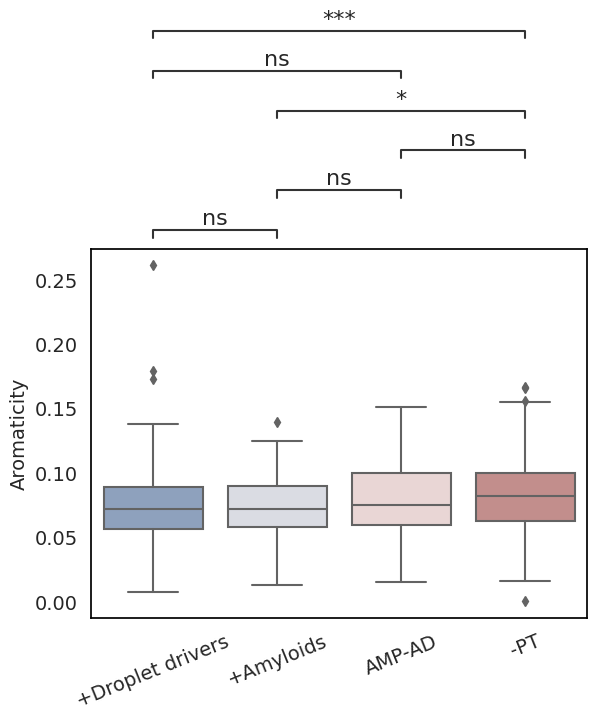

In [28]:
#-PT
d = {'aromaticity_PT': aromaticity_s}
df_aromaticity_s = pd.DataFrame(data=d)
print(len(aromaticity_s))


# +Droplet drivers
d = {'aromaticity_d': aromaticity_d}
df_aromaticity_d = pd.DataFrame(data=d)
print(len(aromaticity_d))

# +Amyloids
d = {'aromaticity_a': aromaticity_a}
df_aromaticity_a = pd.DataFrame(data=d)
print(len(aromaticity_a))

# AMP-AD
d = {'aromaticity_AD': aromaticity_AD}
df_aromaticity_AD = pd.DataFrame(data=d)
print(len(aromaticity_AD))


df_aromaticity_d.rename(columns = {'aromaticity_d':'+Droplet drivers'}, inplace=True)
df_aromaticity_a.rename(columns = {'aromaticity_a':'+Amyloids'}, inplace=True)
df_aromaticity_s.rename(columns = {'aromaticity_PT':'-PT'}, inplace=True)
df_aromaticity_AD.rename(columns = {'aromaticity_AD':'AMP-AD'}, inplace=True)

all_arr = pd.concat([df_aromaticity_d['+Droplet drivers'],df_aromaticity_a['+Amyloids'], 
                     df_aromaticity_s['-PT'], df_aromaticity_AD['AMP-AD'] ], axis=1)

all_arr.head()
statistics(all_arr, 'Aromaticity')

#### Significant features

In [29]:
def disorder(uniprotid):
    "input: UniProt ID."
    "The function uses iupred3 tool (https://iupred3.elte.hu/) to calculate a disorder score for each amino acid"
    "output: disorder score for each amino acid in the sequence"
    
    disorder_score = []
    uniprot = []

    for num, i in enumerate(uniprotid):
        try:
            u = i.split('-')[1].split('-')[0]
        except:
            u = i.split('.')[0]
        
        try: 
            
            url = f'http://iupred3.elte.hu/iupred3/{u}.json'
            score_json = json.loads(requests.get(url).text)
            disorder_score.append(score_json['iupred2'])
            uniprot.append(u)
        except:
                #f=open(f'final_files/{u}.txt',"r") user should produce .txt file using the iupred3 website directly
                #lines=f.readlines()
                #result=[]
                #for x in lines:
                    #result.append(np.float64(x.split("\t",2)[2].split('\t')[0]))
                #f.close()
                #avg_disorder_score.append(result)
                #uniprot.append(u)
                
                #print(num,u)
                continue

    return disorder_score, uniprot

In [30]:
## calculate disorder score for each amino acid (amyloid beta precursor - APP and tau)
disorder_beta_precursor = disorder(['P05067']) 
disorder_tau_758 = disorder(['P10636'])

In [31]:
def disorder2(disorder_score):
    "input: list of disorder scores for the amino acids in sequence"
    "output: fraction of disordered-regions in a sequence. a disordered region"
    "is defined by 20 succssive amino acids in the sequence"
    
    num_residues = 0
    num_of_residues_t = 0
    sum_disorder_regions = []
    fraction_disorder = []
    count_disorder = []

    for num in range(0,len(disorder_score)):
        for n,s in enumerate(disorder_score[num]):

                if s >0.5:
                    num_residues = num_residues + 1
                    #print(num_residues)


                if s <0.5 and num_residues >20 :
                    num_of_residues_t = num_of_residues_t + num_residues 
                    sum_disorder_regions.append(num_of_residues_t)
                    num_of_residues_t=0
                    num_residues=0
                    #print(sum_disorder_regions)


                if s >0.5 and num_residues >20 and (n+1)==len(disorder_score[num]) :
                    num_of_residues_t = num_of_residues_t + num_residues 
                    sum_disorder_regions.append(num_of_residues_t)
                    num_of_residues_t=0
                    num_residues=0
                    #print(sum_disorder_regions)


        fraction_disorder.append(np.sum(sum_disorder_regions)/len(disorder_score[num]))
        count_disorder.append(np.sum(sum_disorder_regions))
        sum_disorder_regions = []
        num_of_residues_t=0
        num_residues=0

    
    return fraction_disorder

360
404
113
189
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

+Droplet drivers v.s. +Amyloids: Welch's t-test independent samples with Bonferroni correction, P_val=6.289e-11 stat=7.235e+00
+Amyloids v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.183e+00
AMP-AD v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=5.925e-11 stat=7.189e+00
+Amyloids v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=4.117e-11 stat=7.571e+00
+Droplet drivers v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=2.363e-19 stat=9.741e+00
+Droplet drivers v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=2.186e-94 stat=2.557e+01


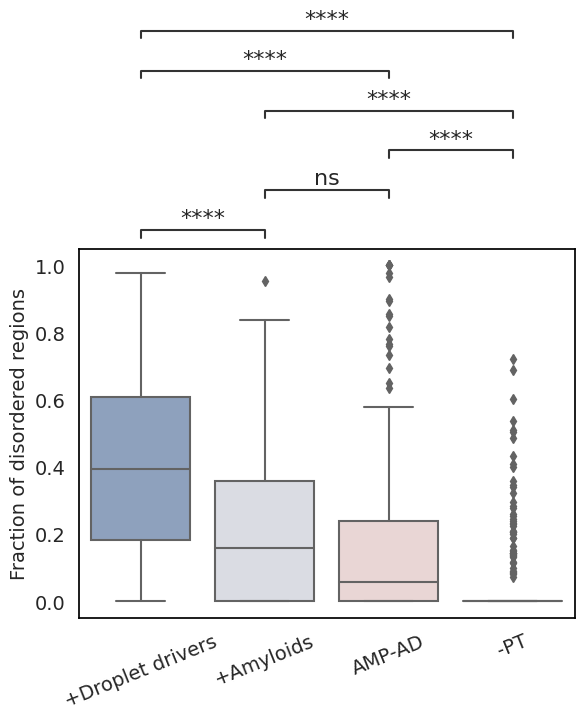

In [32]:
## plot fraction of disordered regions 

frac_disorder_d = disorder2(disorder_d_404)
frac_disorder_a = disorder2(disorder_a_113)
frac_disorder_s = disorder2(disorder_s_360)
frac_disorder_AD = disorder2(disorder_AD_alpha_ESM)

frac_disorder_beta_precursor = disorder2(list(disorder_beta_precursor)[0])
frac_tau_758 = disorder2(list(disorder_tau_758)[0])

#pdb 
d = {'dis_s': frac_disorder_s}
df_dis_s = pd.DataFrame(data=d)
print(len(frac_disorder_s))

#droplets
d = {'dis_d': frac_disorder_d}
df_dis_d = pd.DataFrame(data=d)
print(len(frac_disorder_d))

#amyloids
d = {'dis_a': frac_disorder_a}
df_dis_a = pd.DataFrame(data=d)
print(len(frac_disorder_a))

#AD
d = {'dis_AD': frac_disorder_AD}
df_dis_AD = pd.DataFrame(data=d)
print(len(frac_disorder_AD))


df_dis_s.rename(columns = {'dis_s':'-PT'}, inplace=True)
df_dis_d.rename(columns = {'dis_d':'+Droplet drivers'}, inplace=True)
df_dis_a.rename(columns = {'dis_a':'+Amyloids'}, inplace=True)
df_dis_AD.rename(columns = {'dis_AD':'AMP-AD'}, inplace=True)

all_arr = pd.concat([df_dis_d['+Droplet drivers'],df_dis_a['+Amyloids'], 
                     df_dis_s['-PT'],df_dis_AD['AMP-AD'] ], axis=1)

statistics(all_arr, 'Fraction of disordered regions' )

189
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

+Droplet drivers v.s. +Amyloids: Welch's t-test independent samples with Bonferroni correction, P_val=1.279e-11 stat=7.561e+00
+Amyloids v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-2.472e-01
AMP-AD v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=3.661e-35 stat=1.532e+01
+Amyloids v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=7.508e-22 stat=1.215e+01
+Droplet drivers v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=2.350e-15 stat=8.555e+00
+Droplet drivers v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=4.099e-150 stat=3.820e+01


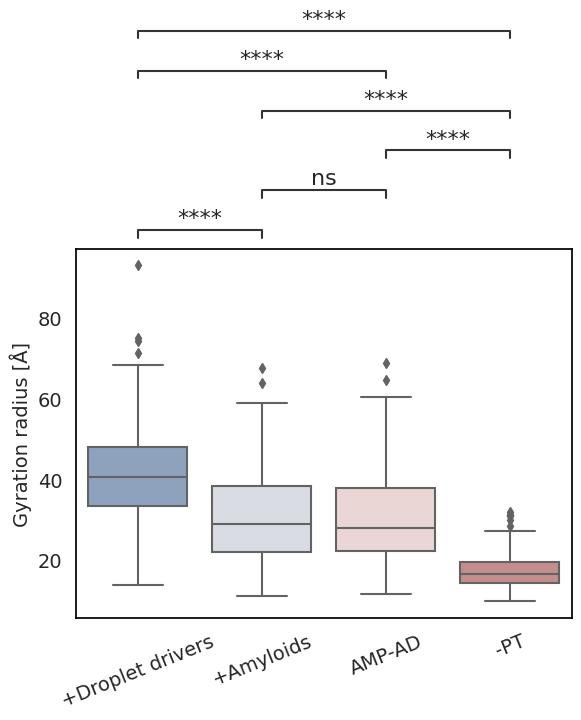

In [33]:
## plot gyration radius

d1= {'+Amyloids': list(amyloid_r_g_a_113)}
d2 = {'+Droplet drivers':list(droplet_driver_r_g_d_404)}
d3 = {'-PT': list(pdb_r_g_s_360)}
d4 = {'AMP-AD': list(alpha_ESM_AD_gr[0:183] + alpha_ESM_AD_gr[184:])}

df_gr_a = pd.DataFrame(data=d1, columns = ['+Amyloids'])
df_gr_d = pd.DataFrame(data=d2, columns = ['+Droplet drivers'])
df_gr_AD = pd.DataFrame(data=d4, columns = ['AMP-AD'])
df_gr_w = pd.DataFrame(data=d3, columns = ['-PT'])

df_a_d_w_AD = pd.concat([df_gr_a, df_gr_d, df_gr_w, df_gr_AD], axis=1)


print(len(df_gr_AD))
statistics(df_a_d_w_AD, 'Gyration radius [Å]')

In [34]:
# mean of hydrophobicity

from Bio.SeqUtils.ProtParam import ProtParamData

X= [ProteinAnalysis(i) for i in gr_protein_seq_d_404]
hydrophbicity_d= [np.mean(i.protein_scale(ProtParamData.kd, 10, 0.5)) for i in X]

X= [ProteinAnalysis(i) for i in gr_protein_seq_a_113]
hydrophbicity_a= [np.mean(i.protein_scale(ProtParamData.kd, 10, 0.5)) for i in X]


X= [ProteinAnalysis(i) for i in gr_protein_seq_pdb_360]
hydrophbicity_s= [np.mean(i.protein_scale(ProtParamData.kd, 10, 0.5)) for i in X]

X= [ProteinAnalysis(i) for i in (alpha_ESM_seq[0:183]+alpha_ESM_seq[184:])]
hydrophbicity_AD= [np.mean(i.protein_scale(ProtParamData.kd, 10, 0.5)) for i in X]

X = [ProteinAnalysis(i) for i in amyloid_beta_precursor]
hydrophbicity_beta =[i.protein_scale(ProtParamData.kd, 10, 0.5) for i in X]

X = [ProteinAnalysis(i) for i in [tau_758]]
hydrophbicity_tau_758 =[i.protein_scale(ProtParamData.kd, 10, 0.5) for i in X]

print(np.mean(hydrophbicity_d))
print(np.mean(hydrophbicity_a))
print(np.mean(hydrophbicity_AD))
#print('len of AD is{}')

print(np.mean(hydrophbicity_s))
print(np.mean(hydrophbicity_beta))
print(np.mean(hydrophbicity_tau_758))

-0.6150603004756122
-0.37153444270440283
-0.34810127528929286
-0.26929018164985086
-0.5908681677735553
-0.8858135171219282


360
404
113
189
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

+Droplet drivers v.s. +Amyloids: Welch's t-test independent samples with Bonferroni correction, P_val=7.673e-08 stat=-5.987e+00
+Amyloids v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.740e-01
AMP-AD v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=2.362e-01 stat=-2.069e+00
+Amyloids v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=8.534e-02 stat=-2.476e+00
+Droplet drivers v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=4.504e-11 stat=-7.134e+00
+Droplet drivers v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=2.565e-36 stat=-1.345e+01


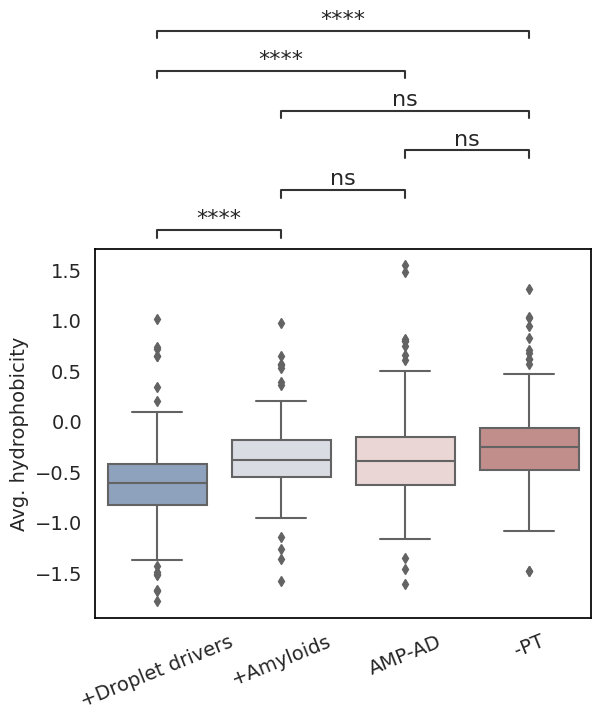

In [35]:
#-PT
d = {'hyd_PT': hydrophbicity_s}
df_hyd_s = pd.DataFrame(data=d)
print(len(hydrophbicity_s))


# +Droplet drivers
d = {'hyd_d': hydrophbicity_d}
df_hyd_d = pd.DataFrame(data=d)
print(len(hydrophbicity_d))

# +Amyloids
d = {'hyd_a': hydrophbicity_a}
df_hyd_a = pd.DataFrame(data=d)
print(len(hydrophbicity_a))

# AMP-AD
d = {'hyd_AD': hydrophbicity_AD}
df_hyd_AD = pd.DataFrame(data=d)
print(len(hydrophbicity_AD))


df_hyd_d.rename(columns = {'hyd_d':'+Droplet drivers'}, inplace=True)
df_hyd_a.rename(columns = {'hyd_a':'+Amyloids'}, inplace=True)
df_hyd_s.rename(columns = {'hyd_PT':'-PT'}, inplace=True)
df_hyd_AD.rename(columns = {'hyd_AD':'AMP-AD'}, inplace=True)

all_arr = pd.concat([df_hyd_d['+Droplet drivers'],df_hyd_a['+Amyloids'], 
                     df_hyd_s['-PT'], df_hyd_AD['AMP-AD']], axis=1)

all_arr.head()
statistics(all_arr, 'Avg. hydrophobicity')

In [36]:
#SWI and probability of solubility. Ref: https://doi.org/10.1093/bioinformatics/btaa578

def SWI_Solubility(df, state):
    "input - dataframe of protein sequence"
    "state: +Droplet drivers, ,AMP-AD, +Amyloids, -PT"
    
    weights = {'A': 0.8356471476582918,
               'C': 0.5208088354857734,
               'E': 0.9876987431418378,
               'D': 0.9079044671339564,
               'G': 0.7997168496420723,
               'F': 0.5849790194237692,
               'I': 0.6784124413866582,
               'H': 0.8947913996466419,
               'K': 0.9267104557513497,
               'M': 0.6296623675420369,
               'L': 0.6554221515081433,
               'N': 0.8597433107431216,
               'Q': 0.789434648348208,
               'P': 0.8235328714705341,
               'S': 0.7440908318492778,
               'R': 0.7712466317693457,
               'T': 0.8096922697856334,
               'W': 0.6374678690957594,
               'V': 0.7357837119163659,
               'Y': 0.6112801822947587, 
               'X':0.75}

    # Constants from logistic fitting
    # prob = 1 / (1 + exp(-(a * x + b)));

    A = 81.0581
    B = -62.7775
    
    
    df['SWI'] = df['Sequence'].apply(lambda x: np.mean([weights[i] for i in x]))
    df['weight_list'] = df['Sequence'].apply(lambda x: ([(weights[i]) for i in x]))
    print('Computing Probability of solubility...', end='\n')
    df['Prob. of Solubility'] = 1/(1 + np.exp(-(A*df['SWI'] + B)))
    print('Exporting file...', end='\n')
    #output_fname = os.path.join(os.getcwd(), f'final_files/gr_swi_results_{state}' +'.csv')
    #df.to_csv(output_fname, index=None)
    print('Done!')
    
    
    return df

In [37]:
## calculate the Probability of solubility

#+Droplet drivers
d = {'Sequence': gr_protein_seq_d_404}
df_d = pd.DataFrame(data=d)

# change the name of the csv output in the SWI_Solubility function
df_weight_list_d = SWI_Solubility(df_d, 'd')


#+Amyloids
d = {'Sequence': gr_protein_seq_a_113}
df_a = pd.DataFrame(data=d)

# change the name of the csv output in the SWI_Solubility function
df_weight_list_a = SWI_Solubility(df_a, 'a')
               
# -PT
d = {'Sequence': gr_protein_seq_pdb_360}
df_s = pd.DataFrame(data=d)

# change the name of the csv output in the SWI_Solubility function
df_weight_list_s = SWI_Solubility(df_s, 'PT')

#AMP-AD
d = {'Sequence': alpha_ESM_seq[0:183]+alpha_ESM_seq[184:] }
df_AD = pd.DataFrame(data=d)

# change the name of the csv output in the SWI_Solubility function
df_weight_list_AD = SWI_Solubility(df_AD, 'AD')


# beta_precursor, tau
d = {'Sequence': amyloid_beta_precursor}
df_beta = pd.DataFrame(data=d)
d = {'Sequence': [tau_758]}
df_tau = pd.DataFrame(data=d)
df_weight_list_beta = SWI_Solubility(df_beta, 'beta_precursor')
df_weight_list_tau = SWI_Solubility(df_tau, 'tau')

print(df_weight_list_beta['Prob. of Solubility'].tolist())
print(df_weight_list_tau['Prob. of Solubility'].tolist())

Computing Probability of solubility...
Exporting file...
Done!
Computing Probability of solubility...
Exporting file...
Done!
Computing Probability of solubility...
Exporting file...
Done!
Computing Probability of solubility...
Exporting file...
Done!
Computing Probability of solubility...
Exporting file...
Done!
Computing Probability of solubility...
Exporting file...
Done!
[0.867165394731303]
[0.9523404178213742]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

+Droplet drivers v.s. +Amyloids: Welch's t-test independent samples with Bonferroni correction, P_val=5.178e-03 stat=3.393e+00
+Amyloids v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=4.700e-04 stat=4.012e+00
AMP-AD v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=2.001e-07 stat=-5.653e+00
+Amyloids v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-5.866e-01
+Droplet drivers v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=3.258e-16 stat=8.906e+00
+Droplet drivers v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=2.708e-04 stat=4.105e+00


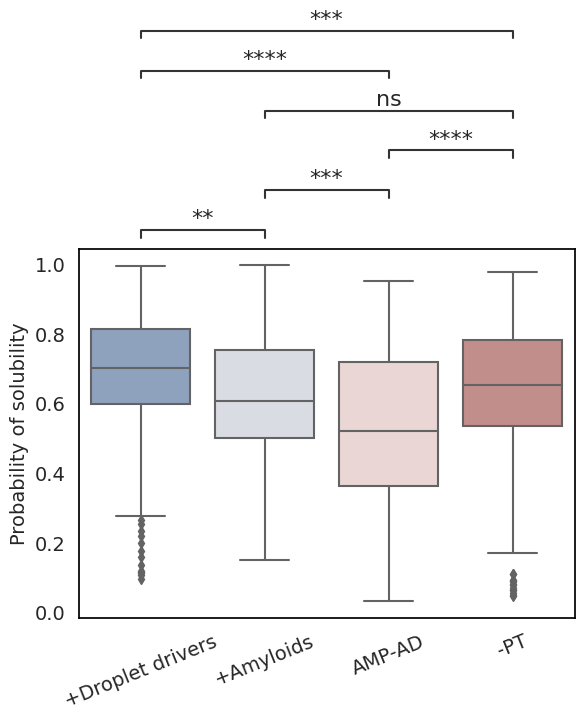

In [38]:
df_d.rename(columns = {'Prob. of Solubility':'+Droplet drivers'}, inplace=True)
df_a.rename(columns = {'Prob. of Solubility':'+Amyloids'}, inplace=True)
df_s.rename(columns = {'Prob. of Solubility':'-PT'}, inplace=True)
df_AD.rename(columns = {'Prob. of Solubility':'AMP-AD'}, inplace=True)

all_arr = pd.concat([df_d['+Droplet drivers'], df_s['-PT'],df_a['+Amyloids'], df_AD['AMP-AD'] ], axis=1)
statistics(all_arr, 'Probability of solubility')

In [39]:
## calculate the instability index

X= [ProteinAnalysis(i) for i in gr_protein_seq_d_404]
ins_d= [i.instability_index() for i in X]

X= [ProteinAnalysis(i) for i in gr_protein_seq_a_113]
ins_a= [i.instability_index() for i in X]

X= [ProteinAnalysis(i) for i in gr_protein_seq_pdb_360]
ins_s= [i.instability_index() for i in X]

X= [ProteinAnalysis(i) for i in amyloid_beta_precursor]
ins_beta= [i.instability_index() for i in X]

X= [ProteinAnalysis(i) for i in [tau_758]]
ins_tau= [i.instability_index() for i in X]


ins_AMP_AD = []
for num, i in enumerate((alpha_ESM_seq[0:183]+alpha_ESM_seq[184:])):
    try:
        ins_AMP_AD.append(ProteinAnalysis(i).instability_index())
    except:
        ins_AMP_AD.append(ProteinAnalysis(i[1:]).instability_index())
        
        


print(np.mean(ins_d))
print(np.mean(ins_a))
print(np.mean(ins_AMP_AD))
print(np.mean(ins_s))
len(ins_AMP_AD)
print(ins_tau)
print(ins_beta)

51.05164191822133
42.09753537368814
49.05662087149586
36.39558555256861
[55.00831134564675]
[40.691441558441696]


360
404
113
189
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

+Droplet drivers v.s. +Amyloids: Welch's t-test independent samples with Bonferroni correction, P_val=1.392e-06 stat=5.383e+00
+Amyloids v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=2.343e-03 stat=-3.595e+00
AMP-AD v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=2.463e-16 stat=8.943e+00
+Amyloids v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=3.445e-03 stat=3.514e+00
+Droplet drivers v.s. AMP-AD: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.364e+00
+Droplet drivers v.s. -PT: Welch's t-test independent samples with Bonferroni correction, P_val=2.206e-41 stat=1.449e+01


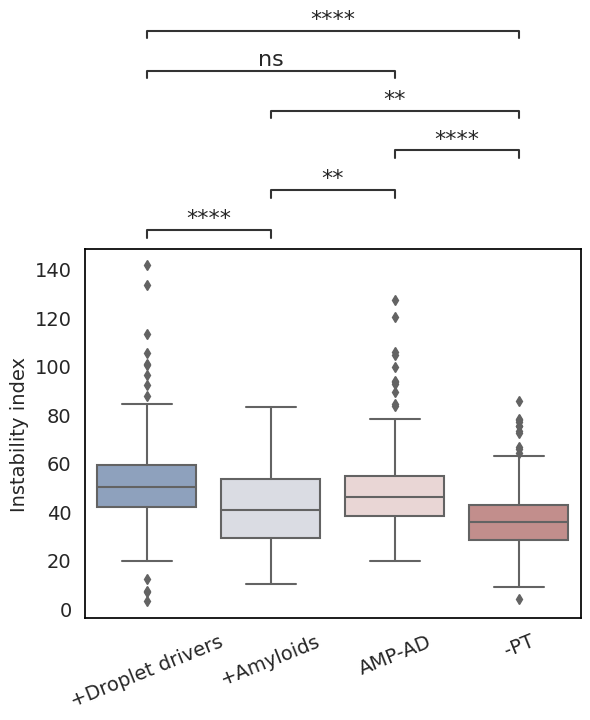

In [40]:
#-PT
d = {'ins_PT': ins_s}
df_ins_s = pd.DataFrame(data=d)
print(len(ins_s))


#droplets
d = {'ins_d': ins_d}
df_ins_d = pd.DataFrame(data=d)
print(len(ins_d))

#amyloids
d = {'ins_a': ins_a}
df_ins_a = pd.DataFrame(data=d)
print(len(ins_a))

#AD
d = {'ins_AD': ins_AMP_AD}
df_ins_AD = pd.DataFrame(data=d)
print(len(ins_AMP_AD))


df_ins_d.rename(columns = {'ins_d':'+Droplet drivers'}, inplace=True)
df_ins_a.rename(columns = {'ins_a':'+Amyloids'}, inplace=True)
df_ins_s.rename(columns = {'ins_PT':'-PT'}, inplace=True)
df_ins_AD.rename(columns = {'ins_AD':'AMP-AD'}, inplace=True)


all_arr = pd.concat([df_ins_d['+Droplet drivers'],df_ins_a['+Amyloids'], 
                     df_ins_s['-PT'], df_ins_AD['AMP-AD'] ], axis=1)
all_arr.head()
statistics(all_arr, 'Instability index')

### Feature distributions
#### +Droplet drivers versus +Amyloids features

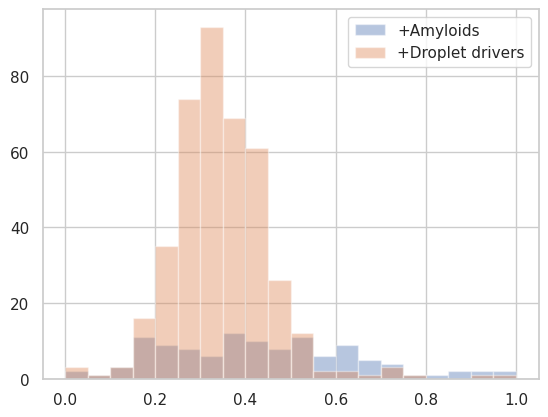

In [41]:
## feature normalization: instability index +Amyloids versus +Droplet drivers

max_ins = np.max(ins_a)
min_ins = np.min(ins_a)
ins_scaled_a = np.array([(x - min_ins) / (max_ins - min_ins) for x in ins_a])

max_ins = np.max(ins_d)
min_ins = np.min(ins_d)
ins_scaled_d = np.array([(x - min_ins) / (max_ins - min_ins) for x in ins_d])


ad_ins_scaled = np.concatenate((ins_scaled_d ,ins_scaled_a), axis=0)


plt.hist(ins_scaled_a, alpha=0.4, bins=20)
plt.hist(ins_scaled_d, alpha=0.4, bins=20)

plt.legend(['+Amyloids', "+Droplet drivers"])

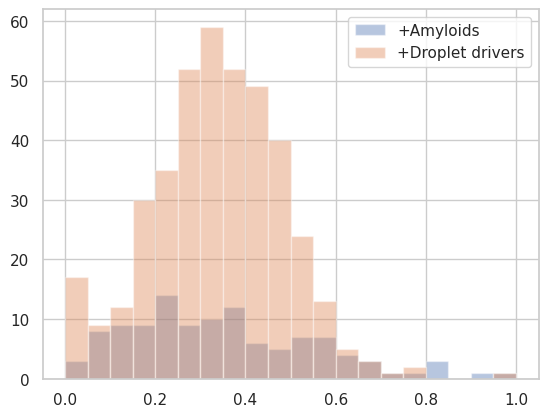

In [42]:
## feature normalization: Gyration radius +Amyloids versus +Droplet drivers

max_gr = np.max(amyloid_r_g_a_113)
min_gr = np.min(amyloid_r_g_a_113)
gr_scaled_a = np.array([(x - min_gr) / (max_gr - min_gr) for x in amyloid_r_g_a_113])

max_gr = np.max(droplet_driver_r_g_d_404)
min_gr = np.min(droplet_driver_r_g_d_404)
gr_scaled_d = np.array([(x - min_gr) / (max_gr - min_gr) for x in droplet_driver_r_g_d_404])

ad_gr_scaled = np.concatenate((gr_scaled_d ,gr_scaled_a), axis=0)

plt.hist(gr_scaled_a, alpha=0.4, bins=20)
plt.hist(gr_scaled_d, alpha=0.4, bins=20)

plt.legend(['+Amyloids', "+Droplet drivers"])

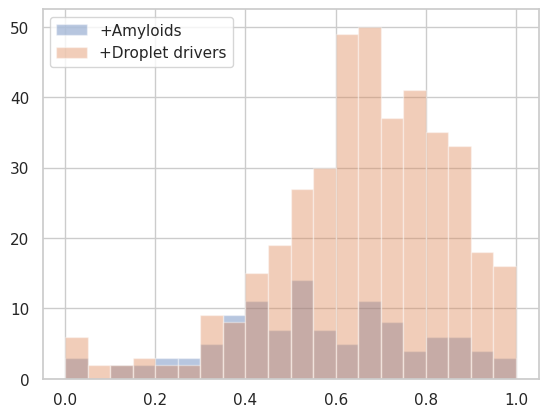

In [43]:
## feature normalization: Probability of Solubility +Amyloids versus +Droplet drivers

df_d = pd.read_csv('final_files/gr_swi_results_d.csv')
df_a = pd.read_csv('final_files/gr_swi_results_a.csv')

gr_prob_swi_a = df_a['Prob. of Solubility'].tolist()
gr_prob_swi_d = df_d['Prob. of Solubility'].tolist()


max_prob_swi = np.max(gr_prob_swi_a)
min_prob_swi = np.min(gr_prob_swi_a)
prob_swi_scaled_a = np.array([(x - min_prob_swi) / (max_prob_swi - min_prob_swi) for x in gr_prob_swi_a])

max_prob_swi = np.max(gr_prob_swi_d)
min_prob_swi = np.min(gr_prob_swi_d)
prob_swi_scaled_d = np.array([(x - min_prob_swi) / (max_prob_swi - min_prob_swi) for x in gr_prob_swi_d])

ad_prob_swi_scaled = np.concatenate((prob_swi_scaled_d  ,prob_swi_scaled_a), axis=0)

plt.hist(prob_swi_scaled_a, alpha=0.4, bins=20)
plt.hist(prob_swi_scaled_d, alpha=0.4, bins=20)

plt.legend(['+Amyloids', "+Droplet drivers"])

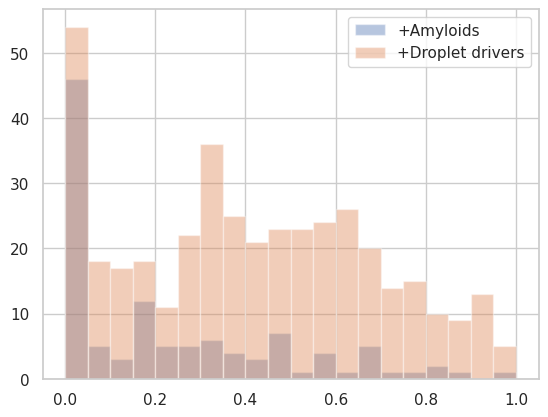

In [44]:
## feature normalization: Probability of Solubility +Amyloids versus +Droplet drivers

max_dis = np.max(frac_disorder_a)
min_dis = np.min(frac_disorder_a)
dis_scaled_a = np.array([(x - min_dis ) / (max_dis  - min_dis ) for x in frac_disorder_a])

max_dis = np.max(frac_disorder_d)
min_dis = np.min(frac_disorder_d)
dis_scaled_d = np.array([(x - min_dis ) / (max_dis  - min_dis ) for x in frac_disorder_d])

ad_dis_scaled_scaled = np.concatenate((dis_scaled_d, dis_scaled_a), axis=0)

plt.hist(dis_scaled_a, alpha=0.4, bins=20)
plt.hist(dis_scaled_d, alpha=0.4, bins=20)

plt.legend(['+Amyloids', "+Droplet drivers"])

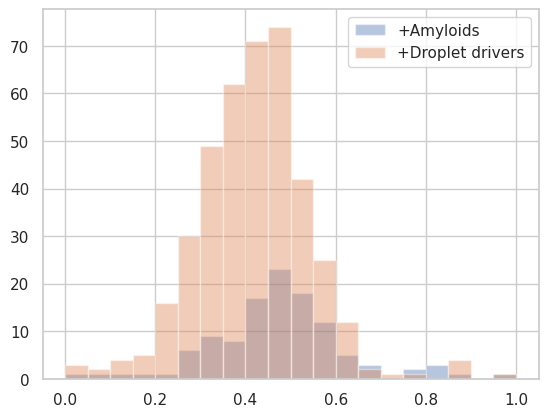

In [45]:
## feature normalization: mean hydrophbicity +Amyloids versus +Droplet drivers

max_hyd = np.max(hydrophbicity_a)
min_hyd = np.min(hydrophbicity_a)
hyd_scaled_a = np.array([(x - min_hyd) / (max_hyd  - min_hyd ) for x in hydrophbicity_a])

max_hyd = np.max(hydrophbicity_d)
min_hyd = np.min(hydrophbicity_d)
hyd_scaled_d = np.array([(x - min_hyd) / (max_hyd  - min_hyd ) for x in hydrophbicity_d])

ad_hyd_scaled = np.concatenate((hyd_scaled_d, hyd_scaled_a), axis=0)

plt.hist(hyd_scaled_a, alpha=0.4, bins=20)
plt.hist(hyd_scaled_d, alpha=0.4, bins=20)

plt.legend(['+Amyloids', "+Droplet drivers"])

#### AMP-AD / APP / tau features

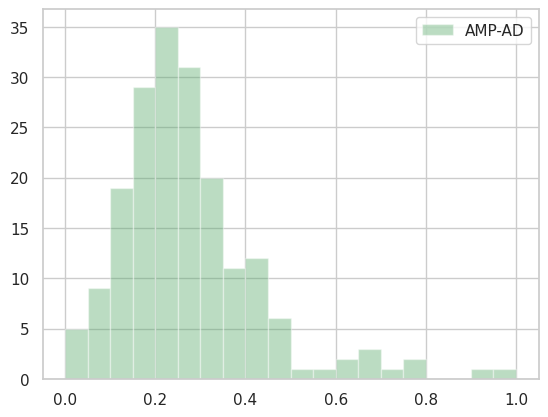

In [49]:
## AMP-AD features

## feature normalization: instability index: AMP-AD

max_ins = np.max(ins_AMP_AD)
min_ins = np.min(ins_AMP_AD)
ins_scaled_AD = np.array([(x - min_ins) / (max_ins - min_ins) for x in ins_AMP_AD])

## beta & tau
ins_scaled_beta = np.array((ins_beta - min_ins) / (max_ins - min_ins) )
ins_scaled_tau = np.array((ins_tau - min_ins) / (max_ins - min_ins) )

# AD that were predicted as droplets+amyloids in droplets+amyloids versus wop
ins_scaled_AD_predicted_da = ins_scaled_AD[alpha_ESM_seq_AD_das_0_indexes]

#ins_scaled_AD_final = list(ins_scaled_AD[0:45])+list(ins_scaled_AD[45:])

plt.hist(ins_scaled_AD , alpha=0.4, bins=20, color='g')

plt.legend(['AMP-AD'])

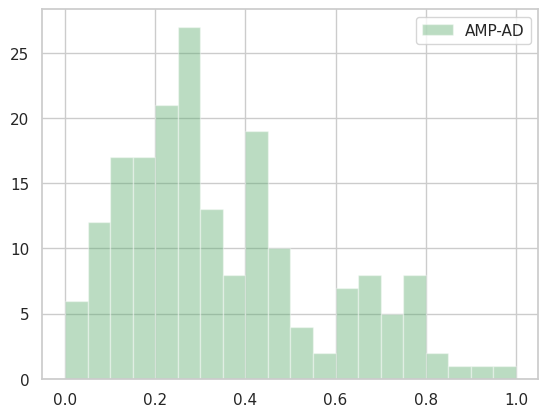

In [50]:
## feature normalization: gyration radius: AMP-AD

r_g_AD = alpha_ESM_AD_gr[0:183] + alpha_ESM_AD_gr[184:]

max_gr = np.max(r_g_AD)
min_gr = np.min(r_g_AD)
gr_scaled_AD = np.array([(x - min_gr) / (max_gr - min_gr) for x in r_g_AD])

# beta & tau
gr_scaled_beta = np.array((gr_amyloid_beta_precursor_tau['P05067'] - min_gr) / (max_gr - min_gr))          
gr_scaled_tau =  np.array((gr_amyloid_beta_precursor_tau['P10636'] - min_gr) / (max_gr - min_gr))                                                  

# AD that were predicted as droplets+amyloids in droplets+amyloids versus wop
gr_scaled_AD_predicted_da = gr_scaled_AD[alpha_ESM_seq_AD_das_0_indexes]

plt.hist(gr_scaled_AD, alpha=0.4, bins=20, color='g')


plt.legend(['AMP-AD'])

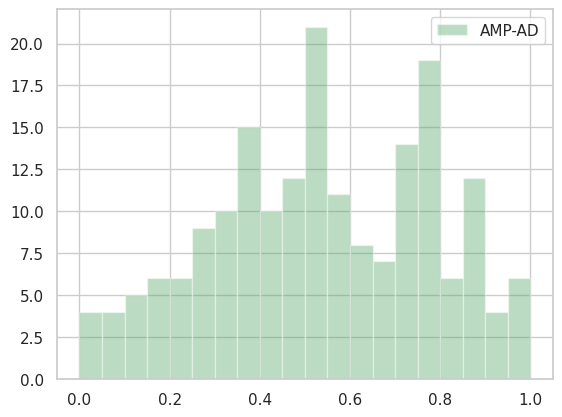

In [51]:
## feature normalization: Probability of Solubility: AMP-AD


df_AD = pd.read_csv('final_files/gr_swi_results_AD.csv')

gr_prob_swi_AD = df_AD['Prob. of Solubility'].tolist()


max_prob_swi = np.max(gr_prob_swi_AD)
min_prob_swi = np.min(gr_prob_swi_AD)
prob_swi_scaled_AD = np.array([(x - min_prob_swi) / (max_prob_swi - min_prob_swi) for x in gr_prob_swi_AD])

## beta & tau
prob_swi_scaled_beta = np.array((df_weight_list_beta['Prob. of Solubility'].tolist()[0] - min_prob_swi) / (max_prob_swi - min_prob_swi))
prob_swi_scaled_tau = np.array((df_weight_list_tau['Prob. of Solubility'].tolist()[0] - min_prob_swi) / (max_prob_swi - min_prob_swi))

# AD that were predicted as droplets+amyloids in droplets+amyloids versus wop
prob_scaled_AD_predicted_da = prob_swi_scaled_AD[alpha_ESM_seq_AD_das_0_indexes]

plt.hist(prob_swi_scaled_AD, alpha=0.4, bins=20, color='g')

plt.legend(['AMP-AD'])

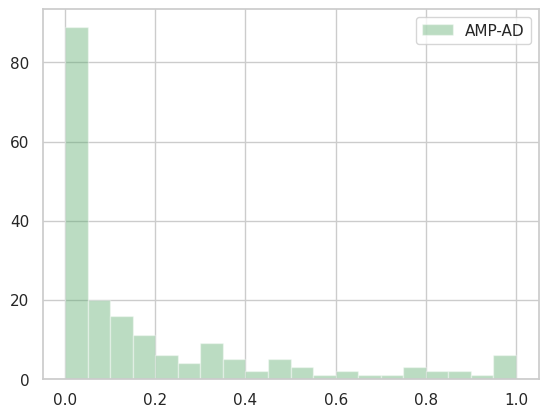

In [52]:
## feature normalization: Fraction of disordered regions: AMP-AD

max_dis = np.max(frac_disorder_AD)
min_dis = np.min(frac_disorder_AD)
dis_scaled_AD = np.array([(x - min_dis ) / (max_dis  - min_dis ) for x in frac_disorder_AD])

## beta & tau

dis_scaled_beta = np.array((frac_disorder_beta_precursor - min_dis ) / (max_dis  - min_dis ))
dis_scaled_tau = np.array((frac_tau_758 - min_dis ) / (max_dis  - min_dis ))

# AD that were predicted as droplets+amyloids in droplets+amyloids versus wop
dis_scaled_AD_predicted_da = dis_scaled_AD[alpha_ESM_seq_AD_das_0_indexes]


plt.hist(dis_scaled_AD, alpha=0.4, bins=20, color='g')

plt.legend(['AMP-AD'])

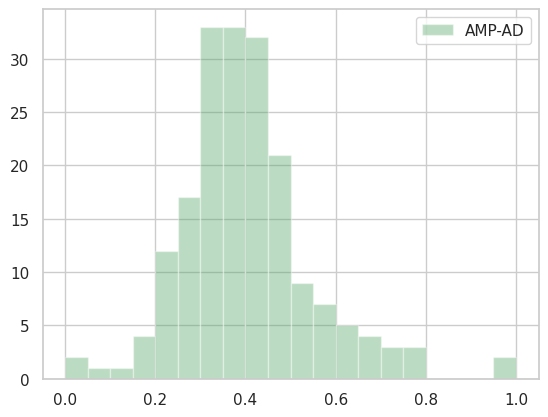

In [53]:
## feature normalization: mean hydrophobocity: AMP-AD

max_hyd = np.max(hydrophbicity_AD)
min_hyd = np.min(hydrophbicity_AD)
hyd_scaled_AD = np.array([(x - min_hyd) / (max_hyd  - min_hyd ) for x in hydrophbicity_AD])

## beta and tau
hyd_scaled_beta = np.array((hydrophbicity_beta - min_dis ) / (max_dis  - min_dis ))
hyd_scaled_tau = np.array((hydrophbicity_tau_758 - min_dis ) / (max_dis  - min_dis ))

# AD that were predicted as droplets+amyloids in droplets+amyloids versus wop
hyd_scaled_AD_predicted_da = hyd_scaled_AD[alpha_ESM_seq_AD_das_0_indexes]


plt.hist(hyd_scaled_AD, alpha=0.4, bins=20, color='g')

plt.legend(['AMP-AD'])

#### -PT features

360


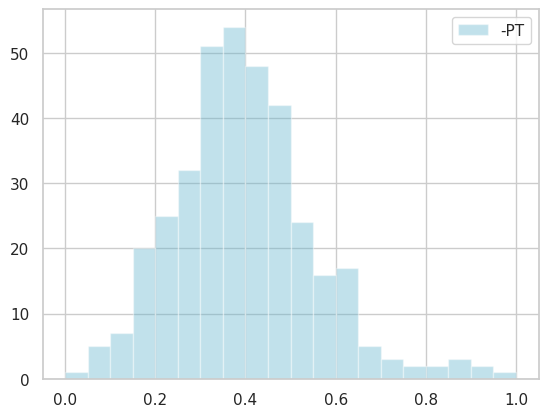

In [54]:
## feature normalization: instability index: -PT

max_ins = np.max(ins_s)
min_ins = np.min(ins_s)
ins_scaled_s = np.array([(x - min_ins) / (max_ins - min_ins) for x in ins_s])

print(len(ins_scaled_s))

plt.hist(ins_scaled_s , alpha=0.4, bins=20, color='c')

plt.legend(['-PT'])

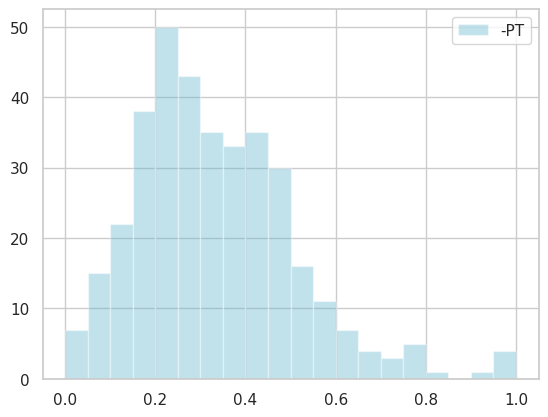

In [55]:
## feature normalization: Gyration radius: -PT

max_gr = np.max(pdb_r_g_s_360)
min_gr = np.min(pdb_r_g_s_360)
gr_scaled_s = np.array([(x - min_gr) / (max_gr - min_gr) for x in pdb_r_g_s_360])


plt.hist(gr_scaled_s, alpha=0.4, bins=20, color='c')

plt.legend(['-PT'])

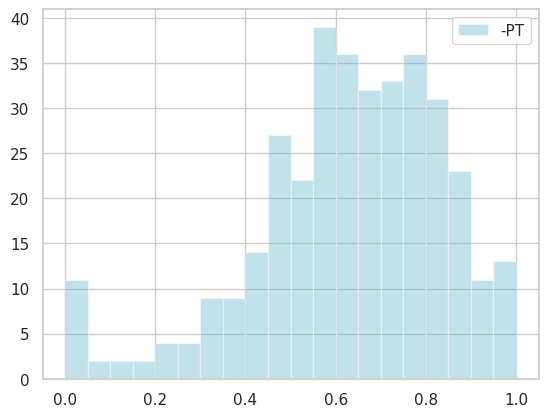

In [56]:
## feature normalization: Probability of Solubility: -PT

df_s = pd.read_csv('final_files/gr_swi_results_PT.csv')

gr_prob_swi_s = df_s['Prob. of Solubility'].tolist()


max_prob_swi = np.max(gr_prob_swi_s)
min_prob_swi = np.min(gr_prob_swi_s)
prob_swi_scaled_s = np.array([(x - min_prob_swi) / (max_prob_swi - min_prob_swi) for x in gr_prob_swi_s])


plt.hist(prob_swi_scaled_s , alpha=0.4, bins=20, color='c')

plt.legend(['-PT'])

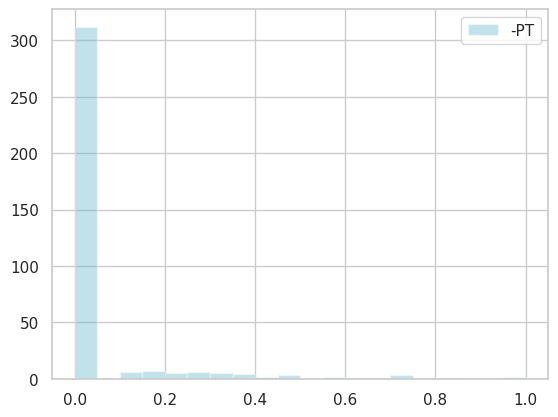

In [57]:
## feature normalization: Fraction of disordered regions: -PT

max_dis = np.max(frac_disorder_s)
min_dis = np.min(frac_disorder_s)
dis_scaled_WOP = np.array([(x - min_dis ) / (max_dis  - min_dis ) for x in frac_disorder_s])

plt.hist(dis_scaled_WOP, alpha=0.4, bins=20, color='c')

plt.legend(['-PT'])

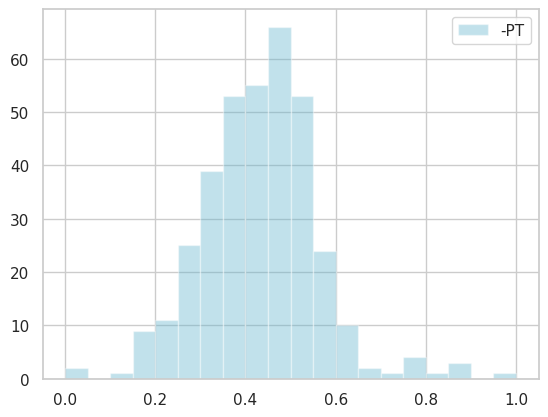

In [58]:
## feature normalization: mean hydrophbicity: -PT

max_hyd = np.max(hydrophbicity_s)
min_hyd = np.min(hydrophbicity_s)
hyd_scaled_s = np.array([(x - min_hyd) / (max_hyd  - min_hyd ) for x in hydrophbicity_s])

plt.hist(hyd_scaled_s, alpha=0.4, bins=20, color='c')

plt.legend(['-PT'])

### Train-Test Random forest (and other classical ML models)

In [59]:
## load the indexes of the train and test sets. 
## These are the same indexes as the ESMForSequenceClassification was trained


## +Dropret drivers & +Amyloids versus -PT (Classification task A)
with open('final_files/train_dataset_idx_das_LM', 'rb') as fp:
                        train_dataset_idx_das_LM = pickle.load(fp)
with open('final_files/val_dataset_idx_das_LM', 'rb') as fp:
                        val_dataset_idx_das_LM = pickle.load(fp)


## +Dropret drivers versus +Amyloids (Classification task B)        
with open('final_files/train_dataset_idx_1', 'rb') as fp:
                        train_dataset_idx = pickle.load(fp)
with open('val_dataset_idx', 'rb') as fp:
                        val_dataset_idx = pickle.load(fp)

#### USER NEEDS TO CHOOSE IF TO RUN EITHER CLASSIFICATION TASK A (the cell below) OR B (the next cell) ####

In [60]:
## Classification task A: +Droplet drivers & +Amyloids versus -PT
## class[0]: +Droplet drivers & +Amyloids
## class [1]: -PT



pos = [0]*len(np.concatenate((gr_scaled_d, gr_scaled_a)))
neg = [1]*len(gr_scaled_s)
y = np.array(pos + neg)


sol_prob = list(np.array(ad_prob_swi_scaled)) + list(np.array(prob_swi_scaled_s))

Rg_f = list(np.array(ad_gr_scaled)) + list(np.array(gr_scaled_s))

dis = list(np.array(ad_dis_scaled_scaled)) + list(np.array(dis_scaled_WOP))

hyd = list(np.array(ad_hyd_scaled)) + list(np.array(hyd_scaled_s))

ins = list(np.array(ad_ins_scaled)) + list(np.array(ins_scaled_s))


x =(np.array([(np.array(Rg_f)),  (np.array(sol_prob)), (np.array(dis)), 
              (np.array(hyd)), (np.array(ins))]))
  
    
x = np.transpose(x)


x_train_A = x[train_dataset_idx_das_LM]
y_train_A = y[train_dataset_idx_das_LM]
x_test_A = x[val_dataset_idx_das_LM]
y_test_A = y[val_dataset_idx_das_LM]


print(len(y_train_A))
print(len(y_test_A))
x.shape

701
176


(877, 5)

In [61]:
## Classification task B: +Droplet drivers versus +Amyloids
## class[0]: +Amyloids
## class [1]: +Droplet drivers

pos = [1]*len(gr_scaled_d)
neg = [0]*len(gr_scaled_a)
y = np.array(pos + neg)


sol_prob = list(np.array(prob_swi_scaled_d)) + list(np.array(prob_swi_scaled_a))

Rg_f = list(np.array(gr_scaled_d)) + list(np.array(gr_scaled_a))

dis = list(np.array(dis_scaled_d)) + list(np.array(dis_scaled_a))

hyd = list(np.array(hyd_scaled_d)) + list(np.array(hyd_scaled_a))

ins = list(np.array(ins_scaled_d)) + list(np.array(ins_scaled_a))

x =(np.array([(np.array(Rg_f)),  (np.array(sol_prob)), (np.array(dis)), 
              (np.array(hyd)), (np.array(ins))]))

x = np.transpose(x)

x_train_B = x[train_dataset_idx]
y_train_B = y[train_dataset_idx]
x_test_B = x[val_dataset_idx]
y_test_B = y[val_dataset_idx]


print(len(y_train_B))
print(len(y_test_B))
x.shape

413
104


(517, 5)

In [62]:
### PCA applied on the 5 biophysical features

def PCA_features(X,Y,class0,class1):
    
    pca = PCA(n_components=2)
    Xt = pca.fit_transform(X)

    print('explained variance',pca.explained_variance_ratio_)


    orig_map=plt.cm.get_cmap('bwr')

    # reversing the original colormap using reversed() function
    reversed_map = orig_map.reversed()

    fig, (ax1) = plt.subplots(1, figsize=(6,5))
    plt.setp(ax1.spines.values(), color='black')

    plt.rcParams["legend.loc"] = 'lower right'

    plot = plt.scatter(Xt[:,0], Xt[:,1], c=Y, cmap = reversed_map, alpha=0.5, s=60)
    plt.legend(handles=plot.legend_elements()[0], labels=[f'{class0}', f'{class1}'], fontsize='13')
    plt.xlabel(f'PC1 {[np.round(pca.explained_variance_ratio_[0], decimals=2)]}', fontsize='16')
    plt.ylabel(f'PC2 {[np.round(pca.explained_variance_ratio_[1], decimals=2)]}', fontsize = '16')
    plt.xticks(fontsize='16')
    plt.yticks(fontsize='16')
    plt.grid(False)

    plt.show()
    
    return

In [67]:
def plot_PCA(x_train_B, x_test_B, y_train_B, y_test_B):
    
    ## apply PCA analysis on the biophysical features
    ## user selects the classification task (A or B)
    ## to use all the data (train + test sets)

    X = list(x_train_B)+list(x_test_B)
    Y = list(y_train_B)+list(y_test_B)

    ## run for classification task A
    #PCA_features(X,Y,'+Amyloids& \n +Droplet drivers','-PT')

    ## run for classification task B
    PCA_features(X,Y,'+Amyloids','+Droplet drivers')
    
    return()   

explained variance [0.54054985 0.1799679 ]


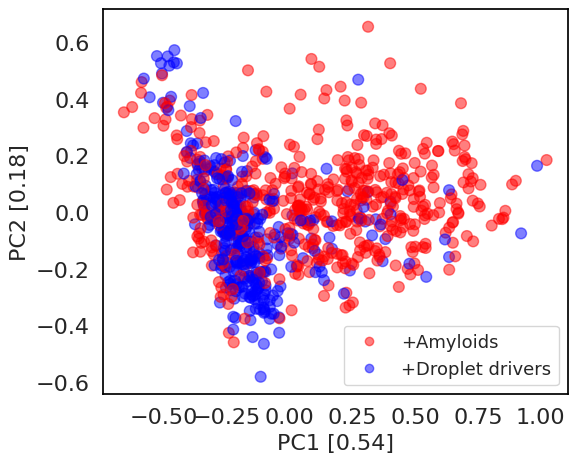

explained variance [0.63365922 0.16320078]


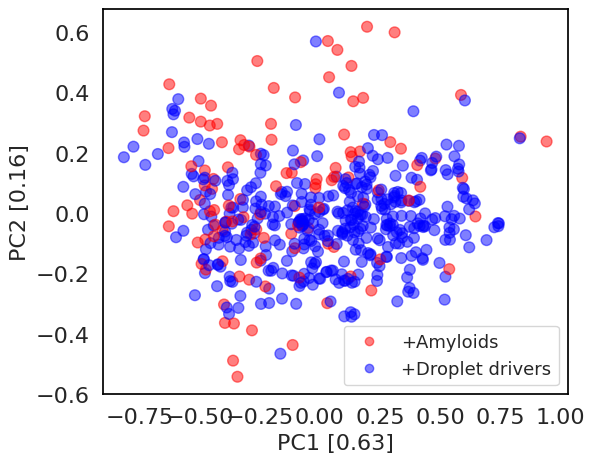

()

In [71]:
# PCA classification task A
plot_PCA(x_train_A, x_test_A, y_train_A, y_test_A)

# PCA classification task B
plot_PCA(x_train_B, x_test_B, y_train_B, y_test_B)

###  run below cell to have AD-AMP features ###

In [72]:
## AD-AMP features

sol_prob = list(np.array(prob_swi_scaled_AD))

## turn on for droplets versus amyloids predictions
#sol_prob = list(np.array(prob_scaled_AD_predicted_da))## 

Rg_f = list(np.array(gr_scaled_AD))

## turn on for droplets versus amyloids predictions
#Rg_f = list(np.array(gr_scaled_AD_predicted_da)) 

dis = list(np.array(dis_scaled_AD))

## turn on for droplets versus amyloids predictions
#dis = list(np.array(dis_scaled_AD_predicted_da)) 


hyd = list(np.array(hyd_scaled_AD))

## turn on for droplets versus amyloids predictions
#hyd = list(np.array(hyd_scaled_AD_predicted_da)) 

ins = list(np.array(ins_scaled_AD))

## turn on for droplets versus amyloids predictions
#ins = list(np.array(ins_scaled_AD_predicted_da)) 


x_AD =(np.array([(np.array(Rg_f)),  (np.array(sol_prob)), (np.array(dis)), (np.array(hyd)), (np.array(ins))]))

x_AD = np.transpose(x_AD)
x_AD.shape

(189, 5)

###  run below cell to have beta and tau features ###

In [73]:
## beta & tau features

sol_prob_beta = list(np.array([prob_swi_scaled_beta]))
sol_prob_tau = list(np.array([prob_swi_scaled_tau]))

Rg_f_beta = list(np.array([gr_scaled_beta]))
Rg_f_tau = list(np.array([gr_scaled_tau]))

dis_beta = list(np.array(dis_scaled_beta))
dis_tau = list(np.array(dis_scaled_tau))


hyd_beta = [np.mean(hydrophbicity_beta)]
hyd_tau = [np.mean(hydrophbicity_tau_758)] 

ins_beta = [np.mean(ins_scaled_beta)]
ins_tau = [np.mean(ins_scaled_tau)]


x_tau =(np.array([(np.array(Rg_f_tau)),  (np.array(sol_prob_tau)), (np.array(dis_tau)), (np.array(hyd_tau)), (np.array(ins_tau))]))

x_tau = np.transpose(x_tau)
x_tau.shape

(1, 5)

In [96]:
### classical models #### - use for classical models benchmark (appease in the SI, Appendix  Tables S1 & S2 )

def classical_models_train(x_train,y_train):
    
    #clf = LogisticRegression(random_state=42, penalty='l1', solver='liblinear', class_weight='balanced')
    #clf = svm.SVC(kernel='rbf', class_weight='balanced')
    #clf = GaussianNB()
    clf = RandomForestClassifier(max_depth=5, class_weight='balanced', random_state=42)

    for n in range(1):
        strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=n)

        scores = cross_val_score(clf, x_train,y_train, cv=5, scoring='recall_macro')
        
        print(np.mean(scores))
        print(np.std(scores))
    return clf

In [97]:
## classical models: 5-folds cross validation metrics evaluation (this for ALL the folds together!)

def cross_val_classical_model(clf, x_train,y_train):
    
    strat_k_fold = StratifiedKFold(n_splits=5, random_state=None)

    predicted = cross_val_predict(clf, X=x_train, y=y_train, cv=strat_k_fold, method='predict') 

    #method='predict_proba
    predicted_prob = cross_val_predict(clf, X=x_train, y=y_train, cv=strat_k_fold 
                                       , method='predict_proba')

    print (metrics.accuracy_score(y_train, predicted))
    print (metrics.classification_report(y_train, predicted))
    
    return [predicted, predicted_prob]

In [76]:
## cross validation classical model: classification task A

### run classical models for classification task A
clf = classical_models_train(x_train_A[:,0:5],y_train_A)

[predicted_A, predicted_prob_A] = cross_val_classical_model(clf,x_train_A[:,0:5],y_train_A)
roc_RF_A = roc_auc_score(y_train_A, predicted_prob_A[:,1])
roc_RF_A

0.8640710955903647
0.04641296125945163
0.8644793152639088
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       413
           1       0.82      0.86      0.84       288

    accuracy                           0.86       701
   macro avg       0.86      0.86      0.86       701
weighted avg       0.87      0.86      0.86       701



0.940509819747108

In [77]:
## cross validation classical model: classification task B

### run classical models for classification task B
clf = classical_models_train(x_train_B[:,0:5],y_train_B)

[predicted_B, predicted_prob_B] = cross_val_classical_model(clf,x_train_B[:,0:5],y_train_B)
roc_RF_B = roc_auc_score(y_train_B, predicted_prob_B[:,1])
roc_RF_B

0.7551682692307693
0.05455553755191782
0.8426150121065376
              precision    recall  f1-score   support

           0       0.65      0.60      0.62        90
           1       0.89      0.91      0.90       323

    accuracy                           0.84       413
   macro avg       0.77      0.76      0.76       413
weighted avg       0.84      0.84      0.84       413



0.8768145854833161

In [78]:
## Feature importance using random forest model calculated using cross validation

def Feature_importance_RF(x_train, y_train, task):
    
    imp_f = [] # save each fold feature importances

    strat_k_fold = StratifiedKFold(n_splits=5, random_state=None)

    output = cross_validate(clf, x_train, y_train, cv=strat_k_fold , scoring = 'accuracy', return_estimator =True)

    for idx,estimator in enumerate(output['estimator']):
        print("Features NOT sorted by their score for Fold {}:".format(idx))
        feature_importances = pd.DataFrame(estimator.feature_importances_,
                                           index = ['Gyration radius', 'Probability of solubility'
                                                    ,'Fraction of disordered regions','Avg. hydrophobicity', 
                                                    'Instability index'])
                                            #columns=['importance']).sort_values('importance', ascending=False)
        print(task, '\n', feature_importances, '\n')
        
        imp_f.append(feature_importances.iloc[:,0].values.tolist())
        
    return [imp_f[0],imp_f[1],imp_f[2],imp_f[3],imp_f[4],feature_importances.index.tolist()]

In [79]:
### Feature importance

[imp_f0A, imp_f1A, imp_f2A, imp_f3A, imp_f4A, namesA] = Feature_importance_RF(x_train_A[:,0:5], y_train_A, 'classification task A')
[imp_f0B, imp_f1B, imp_f2B, imp_f3B, imp_f4B, namesB]  = Feature_importance_RF(x_train_B[:,0:5], y_train_B, 'classification task B' )

Features NOT sorted by their score for Fold 0:
classification task A 
                                        0
Gyration radius                 0.111648
Probability of solubility       0.073777
Fraction of disordered regions  0.621410
Avg. hydrophobicity             0.085629
Instability index               0.107536 

Features NOT sorted by their score for Fold 1:
classification task A 
                                        0
Gyration radius                 0.110312
Probability of solubility       0.075168
Fraction of disordered regions  0.622690
Avg. hydrophobicity             0.099106
Instability index               0.092723 

Features NOT sorted by their score for Fold 2:
classification task A 
                                        0
Gyration radius                 0.118905
Probability of solubility       0.083905
Fraction of disordered regions  0.583899
Avg. hydrophobicity             0.098879
Instability index               0.114411 

Features NOT sorted by their score for Fold

In [81]:
## plot feature importance for classificatin task B (+Amyloids versus +Droplet drivers)

def feature_importance(imp_f0, imp_f1, imp_f2, imp_f3, imp_f4, names):

    #names = ['Instability index','Fraction of disordered regions','Gyration radius','Avg. hydrophobicity','Probability of solubility']

    mean_0 = np.mean([imp_f0[0], imp_f1[0],imp_f2[0],imp_f3[0],imp_f4[0]])
    mean_1 = np.mean([imp_f0[1],imp_f1[1],imp_f2[1],imp_f3[1],imp_f4[1]])
    mean_2 = np.mean([imp_f0[2],imp_f1[2],imp_f2[2],imp_f3[2],imp_f4[2]])
    mean_3 = np.mean([imp_f0[3],imp_f1[3],imp_f2[3],imp_f3[3],imp_f4[3]])
    mean_4 = np.mean([imp_f0[4],imp_f1[4],imp_f2[4],imp_f3[4],imp_f4[4]])


    std_0 = np.std([imp_f0[0],imp_f1[0],imp_f2[0],imp_f3[0],imp_f4[0]])
    std_1 = np.std([imp_f0[1],imp_f1[1],imp_f2[1],imp_f3[1],imp_f4[1]])
    std_2 = np.std([imp_f0[2],imp_f1[2],imp_f2[2],imp_f3[2],imp_f4[2]])
    std_3 = np.std([imp_f0[3],imp_f1[3],imp_f2[3],imp_f3[3],imp_f4[3]])
    std_4 = np.std([imp_f0[4],imp_f1[4],imp_f2[4],imp_f3[4],imp_f4[4]])
  

    x = [mean_0, mean_1, mean_2, mean_3, mean_4]
    x_pos = np.arange(len(names))
    error = [std_0, std_1, std_2, std_3, std_4]
    
    ### sort importance
    x = np.array(x)
    error = np.array(error)
    inds = x.argsort()[::-1]
    x = x[inds]
    error = error[inds]   ## sorted error
    namesort = [names[i] for i in inds]
    names = namesort

    fig, (ax) = plt.subplots(1, figsize=(3,3
                                        ))
    plt.setp(ax.spines.values(), color='black')

    #fig, ax = plt.subplots()
    ax.bar(x_pos-0.2, x, yerr=error, align='center', 
           alpha=0.95, ecolor='black', capsize=10, color='royalblue')
    #ax.set_ylabel('ML model metrics)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(names, fontsize='16', ha="right", rotation=45)


    plt.yticks(fontsize=16)
    ax.yaxis.grid(True)
    #ax.set_title('Feature importance')
    #ax.set_xlabel('Droplets versus Amyloids')
    ax.set_ylabel('Gini score', fontsize='16')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.grid(False)

    
    return

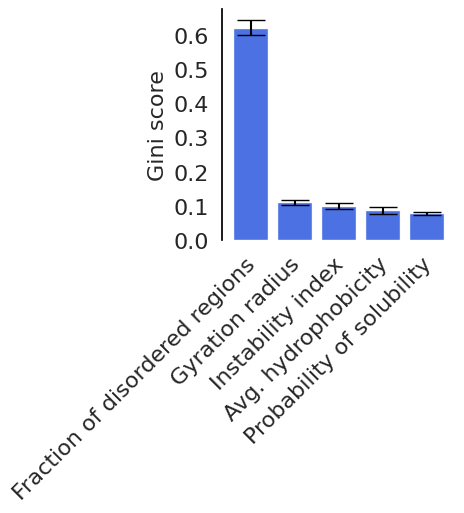

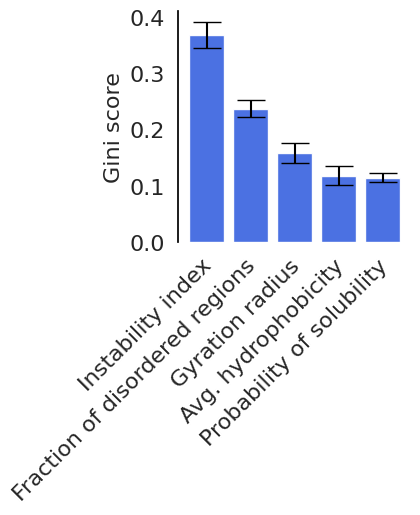

In [82]:
## plot feature importance for classificatin task A (+Amyloids & +Droplet drivers versus -PT)
feature_importance(imp_f0A, imp_f1A, imp_f2A, imp_f3A, imp_f4A, namesA)


## plot feature importance for classificatin task A (+Amyloids versus +Droplet drivers)
feature_importance(imp_f0B, imp_f1B, imp_f2B, imp_f3B, imp_f4B, namesB)

In [83]:
## load language model measures +Droplet drivers versus +Amyloids ###
    
with open('final_files/mean_acc_rec_prec_auc_da_LM_new', 'rb') as fp:
                        avg__acc_rec_prec_auc_LM = pickle.load(fp)


with open('final_files/std_acc_rec_prec_auc_da_LM_new', 'rb') as fp:
                        std__acc_rec_prec_auc_LM = pickle.load(fp)
        
v1 = avg__acc_rec_prec_auc_LM
x_avg_LM_B = [v1[0], v1[1], v1[2], v1[3]]
#v2 = std_acc_prec_rec_auc_LM
v2=std__acc_rec_prec_auc_LM
error_LM_B = [v2[0], v2[1], v2[2], v2[3]]
print(x_avg_LM_B)
print(std__acc_rec_prec_auc_LM)

[0.8885982956215106, 0.770471420940171, 0.8855587789030839, 0.9323517628205128]
[0.0295200285984303, 0.05360283984999598, 0.05151872735194486, 0.03640963209321178]


In [84]:
## load language model measures +Droplet drivers & +Amyloids versus -PT ###  

    
with open('final_files/avg_acc_rec_prec_auc_das_LM_new', 'rb') as fp:
                        avg_acc_rec_prec_auc_das_LM = pickle.load(fp)


with open('final_files/std_acc_rec_prec_auc_das_LM_new', 'rb') as fp: 
                        std_acc_rec_prec_auc_das_LM = pickle.load(fp)
        
#v1 = avg__acc_rec_prec_auc_LM
v1 = avg_acc_rec_prec_auc_das_LM
x_avg_LM_A = [v1[0], v1[1], v1[2], v1[3]]

#v2 = std_acc_prec_rec_auc_LM
v2=std_acc_rec_prec_auc_das_LM
error_LM_A = [v2[0], v2[1], v2[2], v2[3]]
print(x_avg_LM_A)
print(error_LM_A)

[0.9564944275582574, 0.9599521453526911, 0.9528264418619182, 0.9599521453526915]
[0.021046907562509824, 0.020540496535319367, 0.021812594265230183, 0.020540496535319367]


In [85]:
### 5-folds cross-validation plot: RF versus ESMFold models

def cross_val_RF_ESM(x_train,y_train,predicted_prob,predicted,x_avg_LM ,error_LM):
    
    strat_k_fold = StratifiedKFold(n_splits=5, random_state=None)

    fold_pred = [predicted_prob[j] for i, j in strat_k_fold.split(x_train,y_train)]
    fold_predicted= [predicted[j] for i, j in strat_k_fold.split(x_train,y_train)]

    fold_true= [y_train[j] for i, j in strat_k_fold.split(x_train,y_train)]
    mean_acc = np.mean([metrics.accuracy_score(list(i),list(j)) for i,j in zip(fold_true, fold_predicted)])
    std_acc = np.std([metrics.accuracy_score(list(i),list(j)) for i,j in zip(fold_true, fold_predicted)])

    mean_rec = np.mean([metrics.recall_score(list(i),list(j), average='macro') for i,j in zip(fold_true,fold_predicted)])
    std_rec = np.std([metrics.recall_score(list(i),list(j), average='macro') for i,j in zip(fold_true,fold_predicted)])

    mean_prec = np.mean([metrics.precision_score(list(i),list(j), average='macro') for i,j in zip(fold_true,fold_predicted)])
    std_prec = np.std([metrics.precision_score(list(i),list(j), average='macro') for i,j in zip(fold_true,fold_predicted)])


    mean_auc = np.mean([roc_auc_score(list(i),list(j[:,1])) for i,j in zip(fold_true,fold_pred)])
    std_auc = np.std([roc_auc_score(list(i),list(j[:,1])) for i,j in zip(fold_true,fold_pred)])

    measures = ['Accuracy', 'Recall', 'Precision','AUROC']
    x = [mean_acc, mean_rec, mean_prec, mean_auc]
    x_pos = np.arange(len(measures))
    error = [std_acc, std_rec, std_prec, std_auc]

    fig, (ax) = plt.subplots(1, figsize=(7,6))
    plt.setp(ax.spines.values(), color='black')

    ax.bar(x_pos-0.2, x, yerr=error, align='center', alpha=0.95, ecolor='black', capsize=10, width=0.4, color='steelblue')
    ax.bar(x_pos+0.2, x_avg_LM , yerr=error_LM, align='center', alpha=0.95, ecolor='black', capsize=10,width=0.4, color='darkred')

    ax.set_xticks(x_pos)
    ax.set_xticklabels(measures)
    ax.yaxis.grid(True)

    colors = {'RF-ML':'steelblue', 'ESMFold-LM':'darkred'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

    plt.rcParams["legend.loc"] = 'upper center'
    plt.legend(handles, labels, fontsize=18, bbox_to_anchor=(0.13,0.95,0.55,0.2),ncol=2,labelspacing=0)
    plt.yticks(fontsize=22)
    plt.xticks(fontsize=22)
    plt.ylim(0,1)
    plt.grid(False)
    plt.text(-0.08,1.25,'A', fontsize=22, ha='right',va='top',transform=ax.transAxes)
    ax.spines[['right', 'top','bottom']].set_visible(False)
    print(x)
    
    return()

[0.8426388480752278, 0.7551682692307693, 0.772039164951085, 0.8793055555555556]


()

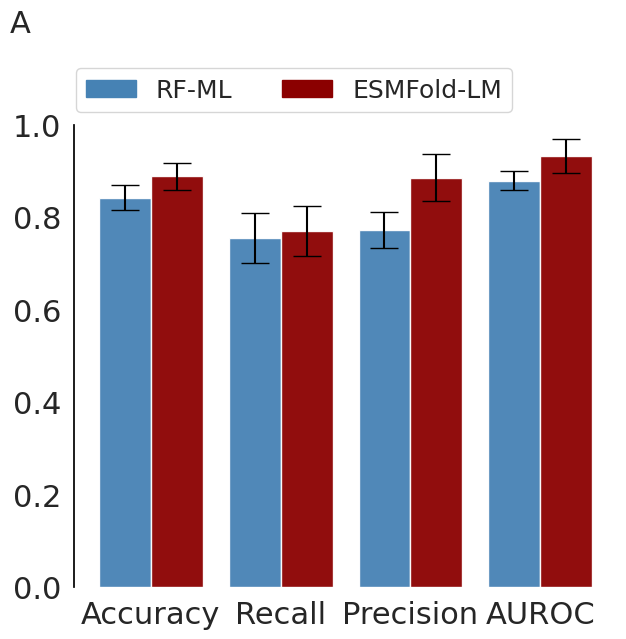

In [99]:
## cross_val_RF_ESM: classification task A
#cross_val_RF_ESM(x_train_A,y_train_A,predicted_prob_A,predicted_A,x_avg_LM_A ,error_LM_A)

## cross_val_RF_ESM: classification task B
cross_val_RF_ESM(x_train_B,y_train_B,predicted_prob_B,predicted_B,x_avg_LM_B ,error_LM_B)

#### Transition Score Calculation ####

In [100]:
### to load pickle files that were dumped with GPU using CPU
import io
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [101]:
#Transition score calculation using Eq. 4

def transition_score(proba_predict_ML, logits_LM, y_test):
    
    "input: probabilities predicted by the RFm logits predicted by the LLM"
    "output: Transition score for the protein"
    
    uniprot_AD_amyloid = []
    uniprot_AD_droplet = []


    probabilities_LM = softmax(logits_LM  , axis=1)

    predict_proba_ML_LM_1 = (proba_predict_ML + probabilities_LM)/2

    y_predicted_ML_LM = []

    for i in predict_proba_ML_LM_1[:,1] :
        if i >0.6:
            y_predicted_ML_LM.append(1)
        else:
            y_predicted_ML_LM.append(0)

    log_like_a = []
    log_like_a_f = []
    log_like_d = []
    log_like_d_f = []


    for num, i in enumerate(predict_proba_ML_LM_1):
        
        if y_predicted_ML_LM[num] == 0:
            
            if (y_test!='AD') & (y_test!='beta') & (y_test!='tau') :
               
                if y_test[num] == 0:
                    log_like_a.append(np.log(i[0]/i[1]))

                    #uniprot_AD_0.append(uniprots_AD[num]) # for das
                    #AD_PT.append('+Droplet drivers & +Amyloids') # for das

                    #uniprot_AD_amyloid.append(uniprots_AD[alpha_ESM_seq_AD_das_0_indexes][num]) ## for da
                    #AD_PT.append('+Amyloids') # for da

                else:
                    #log_like_d.append(np.log(i[0]/i[1]))
                    log_like_a_f.append(np.log(i[0]/i[1]))
                
            else:
                
                log_like_a.append(np.log(i[0]/i[1]))
                #AD_PT.append('+Amyloids') # for da
                

        if y_predicted_ML_LM[num] == 1:
            
            if (y_test!='AD') & (y_test!='beta') & (y_test!='tau'):
                
                if y_test[num] == 1:
                    log_like_d.append(np.log(i[0]/i[1]))

                    #uniprot_AD_1.append(uniprots_AD[num]) # for das
                    #AD_wop.append('-PT') # for das

                    #uniprot_AD_droplet.append(uniprots_AD[alpha_ESM_seq_AD_das_0_indexes][num]) ## for da
                    #AD_wop.append('+Droplet drivers') # for da

                else: 
                    #log_like_a.append(np.log(i[0]/i[1]))
                    log_like_d_f.append(np.log(i[0]/i[1]))
                    
            else:
                
                log_like_d.append(np.log(i[0]/i[1]))
                #AD_wop.append('+Droplet drivers') # for da
                
    
    final_a = log_like_a + log_like_d_f
    final_d = log_like_d + log_like_a_f
    
    if (y_test=='beta') or (y_test=='tau'):
        print('transition score', final_a)
        print('transition score',final_d)
        print(f'{y_test} predicted class {y_predicted_ML_LM}')
          

    if (y_test!='beta') & (y_test!='tau'):
    
        fig, (ax1) = plt.subplots(1, figsize=(4,4))
        plt.setp(ax1.spines.values(), color='black')


        ax = sns.distplot(final_a, fit_kws={"color":"darkred"}, kde=False, norm_hist=True,
                fit=stats.alpha, hist=None, label="+Droplet drivers & +Amyloids")
        ax = sns.distplot(final_d, fit_kws={"color":"darkblue"}, kde=False, norm_hist=True,
                fit=stats.alpha, hist=None, label="-PT")
        ax.set_axisbelow(True)

        colors = {'+Droplet drivers & +Amyloids':'darkred', '-PT':'darkblue'}         
        labels = list(colors.keys())
        #handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

        plt.rcParams["legend.loc"] = 'upper center'
        plt.legend(labels, fontsize=13, bbox_to_anchor=[0.5,1.1] ,ncol=2,labelspacing=0, loc='center')


        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]
        l2 = ax.lines[1]

        # Get the xy data from the lines so that we can shade
        x1 = l1.get_xydata()[:,0]
        y1 = l1.get_xydata()[:,1]
        x2 = l2.get_xydata()[:,0]
        y2 = l2.get_xydata()[:,1]

        ax.fill_between(x1,y1, color="red", alpha=0.3)
        ax.fill_between(x2,y2, color="blue", alpha=0.3)


        ax.yaxis.grid(False)
        ax.xaxis.grid(False)
        plt.xlabel('Transition score', fontsize = 16)
        plt.ylabel('Density', fontsize = 16)
        plt.rcParams["legend.loc"] = 'upper left'

        plt.yticks(fontsize=16)
        plt.xticks(fontsize=16)
        plt.ylim(0 , 1.6)
        #plt.legend(fontsize=16)

        plt.hist(final_a, alpha=0.3, density=True, color='r')
        plt.hist(final_d, alpha=0.3, density=True, color='b')

        #plt.show(block=False)

        ax.spines[['right', 'top']].set_visible(False)
        
        plt.show()

        data = [final_a, final_d]
        plt.boxplot(data)
        t_stat, p_value = ttest_ind(final_a, final_d, equal_var=False)
        print('p-value',p_value)
        
    else:
        pass
    
    return

/tmp/ipykernel_2054726/990127870.py:93: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(final_a, fit_kws={"color":"darkred"}, kde=False, norm_hist=True,
/gpfs/gibbs/pi/gerstein/mbf34/conda_envs/env_name2/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/tmp/ipykernel_2054726/990127870.py:95: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

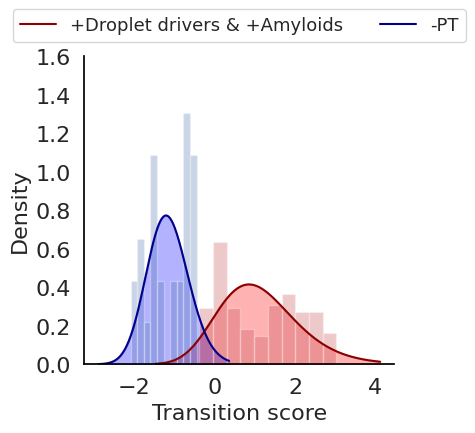

p-value 1.1302637806901371e-27


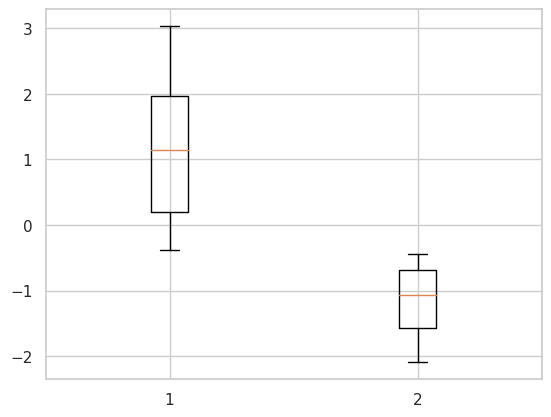

In [102]:
#################################################################
## AMP-AD classification task A: +Droplet drivers & +Amyloids vs. -PT

with open('final_files/proba_predict_AD_das_ML', 'rb') as fp:
                        proba_predict_AD_das_ML = pickle.load(fp)
    
with open('final_files/logits_das_AD_LM', 'rb') as fp:
                        logits_das_AD_LM = CPU_Unpickler(fp).load()    
    
logits_das_AD_LM_list = []
for i in logits_das_AD_LM:
    logits_das_AD_LM_list.append(i[0].tolist())
logits_das_AD_LM = logits_das_AD_LM_list[0:183]+logits_das_AD_LM_list[184:]

y_test='AD'        
transition_score(proba_predict_AD_das_ML, logits_das_AD_LM, y_test)

/tmp/ipykernel_2054726/990127870.py:93: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(final_a, fit_kws={"color":"darkred"}, kde=False, norm_hist=True,
/gpfs/gibbs/pi/gerstein/mbf34/conda_envs/env_name2/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/tmp/ipykernel_2054726/990127870.py:95: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

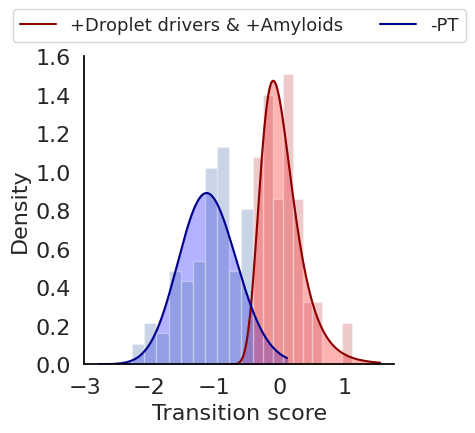

p-value 2.606419948566896e-41


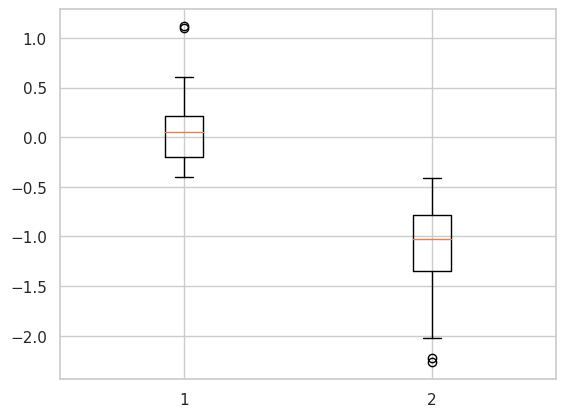

In [103]:
## AMP-AD classification task B: +Droplet drivers vs +Amyloids
with open('final_files/proba_predict_AD_da_ML', 'rb') as fp:
                        proba_predict_AD_da_ML = pickle.load(fp)
with open('final_files/logits_da_AD_LM', 'rb') as fp:
                        logits_da_AD_LM = pickle.load(fp)
y_test='AD'        
transition_score(proba_predict_AD_da_ML, logits_da_AD_LM, y_test)

In [104]:
def run_RF(x_train,y_train,x_test):
    
    clf = RandomForestClassifier(max_depth=5, class_weight='balanced', random_state=42)
    clf.fit(x_train,y_train)
    proba_predict_ML = clf.predict_proba(x_test)
    predict_ML = clf.predict(x_test)
    print('len of predictions',len(predict_ML))
    
    return [proba_predict_ML, predict_ML]

len of predictions 104


/tmp/ipykernel_2044916/2701608850.py:99: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(final_a, fit_kws={"color":"darkred"}, kde=False, norm_hist=True,
/gpfs/gibbs/pi/gerstein/mbf34/conda_envs/env_name2/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/tmp/ipykernel_2044916/2701608850.py:101: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogra

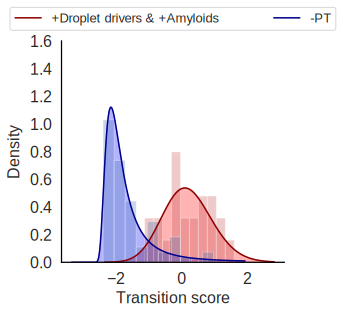

p-value 5.5253228328327176e-12


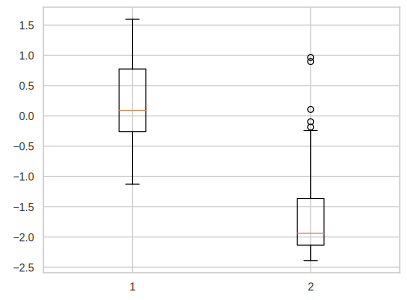

In [219]:
# +Droplet drivers versus +Amyloids
with open('final_files/logits_DA_test_LM', 'rb') as fp:
                        logits_DA_test_LM = pickle.load(fp)


proba_predict_ML, predict_ML = run_RF(x_train_B,y_train_B,x_test_B)

transition_score(proba_predict_ML, logits_DA_test_LM, list(y_test_B))

len of predictions 176


/tmp/ipykernel_2044916/2701608850.py:99: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(final_a, fit_kws={"color":"darkred"}, kde=False, norm_hist=True,
/gpfs/gibbs/pi/gerstein/mbf34/conda_envs/env_name2/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/tmp/ipykernel_2044916/2701608850.py:101: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogra

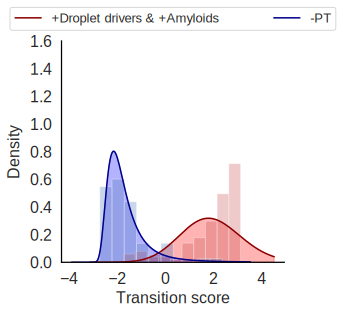

p-value 2.161431042049481e-53


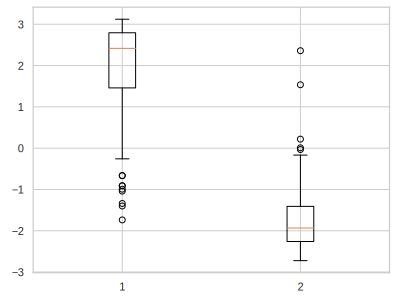

In [221]:
## + Droplet drivers & +Amyloid versus -PT
with open('final_files/logits_test_final_das_LM', 'rb') as fp:
                        logits_test_final_das_LM = pickle.load(fp)

        
proba_predict_ML, predict_ML = run_RF(x_train_A,y_train_A,x_test_A)

transition_score(proba_predict_ML, logits_test_final_das_LM, list(y_test_A))        

In [222]:
#APP transition score
## +Droplet drivers & +Amyloids versus -PT

with open('final_files/logits_beta_das_LM', 'rb') as fp:
                        logits_beta_das_LM = pickle.load(fp)
with open('final_files/proba_predict_das_beta_ML', 'rb') as fp:
                        proba_predict_das_beta_ML = pickle.load(fp)

y_test='beta' 
transition_score(proba_predict_das_beta_ML, [logits_beta_das_LM], y_test)  

transition score [1.1923362262905868]
transition score []
beta predicted class [0]


In [223]:
#beta transition score
## +Droplet drivers versus +Amyloids
with open('final_files/logits_beta_da_LM', 'rb') as fp:
                        logits_beta_da_LM = pickle.load(fp)

with open('final_files/proba_predict_da_beta_ML', 'rb') as fp:
                        proba_predict_da_beta_ML = pickle.load(fp)

y_test='beta' 
transition_score(proba_predict_da_beta_ML, [logits_beta_da_LM], y_test)   

transition score [-0.06054188996226099]
transition score []
beta predicted class [0]


In [224]:
#tau transition score
## +Droplet drivers & +Amyloids versus -PT

with open('final_files/logits_beta_das_LM', 'rb') as fp:
                        logits_tau_das_LM = pickle.load(fp)
with open('final_files/predict_proba_das_tau', 'rb') as fp:
                        predict_proba_das_tau = pickle.load(fp)
y_test='tau' 
transition_score(predict_proba_das_tau, [logits_tau_das_LM], y_test)   

transition score [0.9542603963426588]
transition score []
tau predicted class [0]


In [225]:
#tau transition score
## +Droplet drivers versus +Amyloids

with open('final_files/logits_tau_da_LM', 'rb') as fp:
                        logits_tau_da_LM = pickle.load(fp)
with open('final_files/proba_predict_da_tau_ML', 'rb') as fp:
                        proba_predict_da_tau_ML = pickle.load(fp)
        
y_test='tau' 
transition_score(proba_predict_da_tau_ML, [logits_tau_da_LM ], y_test)

transition score []
transition score [-1.0655676530451568]
tau predicted class [1]


In [187]:
## AMP_AD sequence fractions in different states
def prediced_seq_frac_AMP_AD(uniprots_AD_wop,uniprots_AD_da_a,uniprots_AD_da_d,task,class1,class0):
    
    %config InlineBackend.figure_format = 'svg'
    
    ## plot prediction counts:

    ## droplets+amyloids versus wop

    names = [f'{class1}', f'{class0}']
    x_pos = np.arange(len(names))
    sum_uniprots = len(uniprots_AD_da_d) + len(uniprots_AD_da_a) + len(uniprots_AD_wop)
    #sum_uniprots = len(uniprots_AD_da_d) + len(uniprots_AD_da_a) 
    
    if task =='A':
        x = [len(uniprots_AD_wop)/sum_uniprots, (len(uniprots_AD_da_d) + len(uniprots_AD_da_a))/sum_uniprots]
    else:
        x = [len(uniprots_AD_da_d)/sum_uniprots, len(uniprots_AD_da_a)/sum_uniprots]

    fig, (ax) = plt.subplots(1, figsize=(5.5,5.5))
    plt.setp(ax.spines.values(), color='black')


    barlist=ax.bar(x_pos, x, align='center', alpha=0.4, ecolor='black', capsize=10)
    barlist[0].set_color('blue')
    barlist[1].set_color('red')
    ax.set_ylabel('ML model metrics)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(names, fontsize=20)
    #ax.yaxis.grid(True)
    plt.ylim(0 , 1)
    plt.yticks(fontsize=20)

    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    ax.set_ylabel('Predicted sequence fraction', fontsize=20)
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)

    
    return

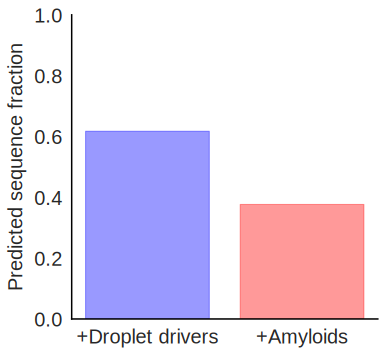

In [188]:
## load predictions uniprots AD
with open('final_files/uniprots_AD_wop', 'rb') as fp:
                            uniprots_AD_wop = pickle.load(fp)
with open('final_files/uniprots_AD_da_a', 'rb') as fp:
                            uniprots_AD_da_a = pickle.load(fp)
with open('final_files/uniprots_AD_da_d', 'rb') as fp:
                            uniprots_AD_da_d = pickle.load(fp)

## run: AMP-AD predicted sequence fraction for classification task A
#prediced_seq_frac_AMP_AD(uniprots_AD_wop,uniprots_AD_da_a,uniprots_AD_da_d,'A','-PT','+Droplet drivers & \n +Amyloids')

## run: AMP-AD predicted sequence fraction for classification task B
prediced_seq_frac_AMP_AD([0],uniprots_AD_da_a,uniprots_AD_da_d,'B','+Droplet drivers','+Amyloids')

### Random forest (RF) , LLM and combined ML and LLM (ML_LM)  - test set
#### Classification task A

len of predictions 176
combined das               precision    recall  f1-score   support

           0       0.93      0.91      0.92       104
           1       0.88      0.90      0.89        72

    accuracy                           0.91       176
   macro avg       0.90      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176

ML das               precision    recall  f1-score   support

           0       0.88      0.87      0.87       104
           1       0.81      0.83      0.82        72

    accuracy                           0.85       176
   macro avg       0.85      0.85      0.85       176
weighted avg       0.85      0.85      0.85       176

LM das               precision    recall  f1-score   support

           0       0.98      0.90      0.94       104
           1       0.88      0.97      0.92        72

    accuracy                           0.93       176
   macro avg       0.93      0.94      0.93       176
weighted avg       0.94 

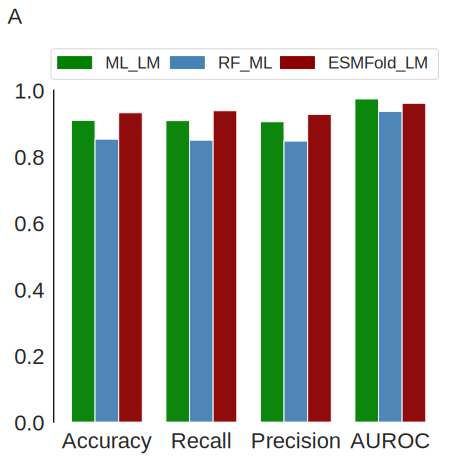

In [190]:
### combined model das test set
from sklearn.metrics import roc_auc_score
from scipy.special import softmax

proba_predict_ML, predict_ML = run_RF(x_train_A,y_train_A,x_test_A)  
y_predicted_ML_LM = []
predict_ML_das = predict_ML
       

with open('final_files/logits_test_final_das_LM', 'rb') as fp:
                        logits_test_final_das_LM = pickle.load(fp) 
        
with open('final_files/predicted_class_id_test_final_das_LM', 'rb') as fp:
                        predicted_class_id_test_final_das_LM = pickle.load(fp) 

proba_predict_ML2  = proba_predict_ML 

probabilities_LM = softmax(logits_test_final_das_LM , axis=1)


predict_proba_ML_LM= (proba_predict_ML2 + probabilities_LM)/2


for i in predict_proba_ML_LM[:,1] :
    if i >0.6:
        y_predicted_ML_LM.append(1)
    else:
        y_predicted_ML_LM.append(0)

y_test = y_test_A        
print ('combined das', metrics.classification_report(y_test, y_predicted_ML_LM)) 
print('ML das', metrics.classification_report(y_test, predict_ML_das))### predict_ML from running the notebook
print('LM das', metrics.classification_report(y_test, predicted_class_id_test_final_das_LM))

acc_comb = metrics.accuracy_score(y_test, y_predicted_ML_LM)
rec_comb = metrics.recall_score(y_test, y_predicted_ML_LM, average='macro')
prec_comb = metrics.precision_score(y_test, y_predicted_ML_LM, average='macro')
roc_comb = roc_auc_score(y_test, predict_proba_ML_LM[:,1])
comb = [acc_comb,rec_comb,prec_comb,roc_comb]
print('comb', comb)

acc_ML = metrics.accuracy_score(y_test, predict_ML_das)
rec_ML = metrics.recall_score(y_test, predict_ML_das, average='macro')
prec_ML = metrics.precision_score(y_test, predict_ML_das, average='macro')
roc_ML = roc_auc_score(y_test, proba_predict_ML[:,1])
RF_ML = [acc_ML,rec_ML,prec_ML,roc_ML]
print('RF_ML', RF_ML)  


acc_LM = metrics.accuracy_score(y_test, predicted_class_id_test_final_das_LM)
rec_LM = metrics.recall_score(y_test, predicted_class_id_test_final_das_LM, average='macro')
prec_LM = metrics.precision_score(y_test, predicted_class_id_test_final_das_LM, average='macro')
roc_LM = roc_auc_score(y_test, probabilities_LM[:,1])
ESMFold_LM = [acc_LM,rec_LM,prec_LM,roc_LM]
print('ESMFold_LM', ESMFold_LM)  


measures = ['Accuracy', 'Recall', 'Precision','AUROC']
x_pos = np.arange(len(measures))


fig, (ax) = plt.subplots(1, figsize=(7,6))
plt.setp(ax.spines.values(), color='black')

#fig, ax = plt.subplots(figsize=(8,7))
ax.bar(x_pos-0.25, comb, align='center', alpha=0.95, ecolor='black', capsize=10, width=0.25, color='green')
ax.bar(x_pos, RF_ML , align='center', alpha=0.95, ecolor='black', capsize=10,width=0.25, color='steelblue')
ax.bar(x_pos+0.25, ESMFold_LM , align='center', alpha=0.95, ecolor='black', capsize=10,width=0.25, color='darkred')


#ax.set_ylabel('ML model metrics)')
ax.set_xticks(x_pos)
ax.set_xticklabels(measures)
ax.yaxis.grid(True)

colors = {'ML_LM':'green', 'RF_ML':'steelblue', 'ESMFold_LM':'darkred'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

plt.rcParams["legend.loc"] = 'upper center'
plt.legend(handles, labels, fontsize=17, bbox_to_anchor=(0.49,0.95,0,0.2),
           ncol=3,labelspacing=0, columnspacing=0.5)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.ylim(0,1)
plt.grid(False)
plt.text(-0.08,1.25,'A', fontsize=22, ha='right',va='top',transform=ax.transAxes)
ax.spines[['right', 'top','bottom']].set_visible(False)

### Random forest (RF) , LLM and combined ML and LLM (ML_LM)  - test set
#### Classification task B

len of predictions 104
combined da               precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.94      0.90      0.92        81

    accuracy                           0.88       104
   macro avg       0.81      0.84      0.83       104
weighted avg       0.88      0.88      0.88       104

ML da               precision    recall  f1-score   support

           0       0.65      0.65      0.65        23
           1       0.90      0.90      0.90        81

    accuracy                           0.85       104
   macro avg       0.78      0.78      0.78       104
weighted avg       0.85      0.85      0.85       104

LM da               precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.89      0.98      0.93        81

    accuracy                           0.88       104
   macro avg       0.88      0.77      0.81       104
weighted avg       0.88    

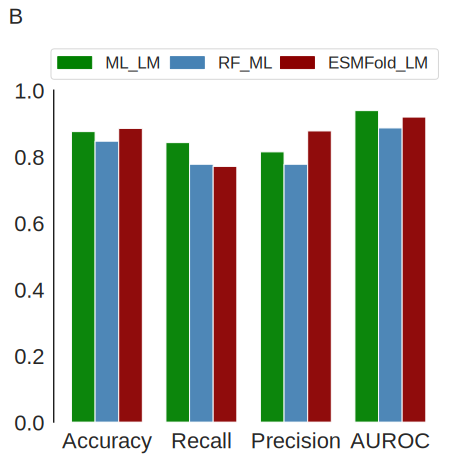

In [81]:
### combined model da test set
from sklearn.metrics import roc_auc_score
from scipy.special import softmax


proba_predict_ML, predict_ML = run_RF(x_train_B,y_train_B,x_test_B)  
y_predicted_ML_LM = []
predict_ML_da = predict_ML
       

with open('final_files/logits_DA_test_LM', 'rb') as fp:
                        logits_DA_test_LM = pickle.load(fp) 
        
with open('final_files/predicted_class_DA_test_LM', 'rb') as fp:
                        predicted_class_DA_test_LM = pickle.load(fp)
      
        
proba_predict_ML2  = proba_predict_ML 

probabilities_LM = softmax(logits_DA_test_LM , axis=1)


predict_proba_ML_LM= (proba_predict_ML2 + probabilities_LM)/2


for i in predict_proba_ML_LM[:,1] :
    if i >0.6:
        y_predicted_ML_LM.append(1)
    else:
        y_predicted_ML_LM.append(0)

y_test = y_test_B        
print ('combined da', metrics.classification_report(y_test, y_predicted_ML_LM)) 
print('ML da', metrics.classification_report(y_test, predict_ML_da))### predict_ML from running the notebook
print('LM da', metrics.classification_report(y_test, predicted_class_DA_test_LM))

acc_comb = metrics.accuracy_score(y_test, y_predicted_ML_LM)
rec_comb = metrics.recall_score(y_test, y_predicted_ML_LM, average='macro')
prec_comb = metrics.precision_score(y_test, y_predicted_ML_LM, average='macro')
roc_comb = roc_auc_score(y_test, predict_proba_ML_LM[:,1])
comb = [acc_comb,rec_comb,prec_comb,roc_comb]
print('comb', comb)

acc_ML = metrics.accuracy_score(y_test, predict_ML_da)
rec_ML = metrics.recall_score(y_test, predict_ML_da, average='macro')
prec_ML = metrics.precision_score(y_test, predict_ML_da, average='macro')
roc_ML = roc_auc_score(y_test, proba_predict_ML[:,1])
RF_ML = [acc_ML,rec_ML,prec_ML,roc_ML]
print('RF_ML', RF_ML)  


acc_LM = metrics.accuracy_score(y_test, predicted_class_DA_test_LM)
rec_LM = metrics.recall_score(y_test, predicted_class_DA_test_LM, average='macro')
prec_LM = metrics.precision_score(y_test, predicted_class_DA_test_LM, average='macro')
roc_LM = roc_auc_score(y_test, probabilities_LM[:,1])
ESMFold_LM = [acc_LM,rec_LM,prec_LM,roc_LM]
print('ESMFold_LM', ESMFold_LM)  


measures = ['Accuracy', 'Recall', 'Precision','AUROC']
x_pos = np.arange(len(measures))


fig, (ax) = plt.subplots(1, figsize=(7,6))
plt.setp(ax.spines.values(), color='black')

#fig, ax = plt.subplots(figsize=(8,7))
ax.bar(x_pos-0.25, comb, align='center', alpha=0.95, ecolor='black', capsize=10, width=0.25, color='green')
ax.bar(x_pos, RF_ML , align='center', alpha=0.95, ecolor='black', capsize=10,width=0.25, color='steelblue')
ax.bar(x_pos+0.25, ESMFold_LM , align='center', alpha=0.95, ecolor='black', capsize=10,width=0.25, color='darkred')


#ax.set_ylabel('ML model metrics)')
ax.set_xticks(x_pos)
ax.set_xticklabels(measures)
ax.yaxis.grid(True)

colors = {'ML_LM':'green', 'RF_ML':'steelblue', 'ESMFold_LM':'darkred'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

plt.rcParams["legend.loc"] = 'upper center'
plt.legend(handles, labels, fontsize=17, bbox_to_anchor=(0.49,0.95,0,0.2),
           ncol=3,labelspacing=0, columnspacing=0.5)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.ylim(0,1)
plt.grid(False)
plt.text(-0.08,1.25,'B', fontsize=22, ha='right',va='top',transform=ax.transAxes)
ax.spines[['right', 'top','bottom']].set_visible(False)

#### Random forest (RF) predicted probabilities - ab42 mutated sequences Ref. doi:10.1016/S0022-2836(02)00399-6). Fig. 2

In [ ]:
### Random forest (RF) on mutated sequences

with open('final_files/samples/ab42_features', 'rb') as fp:
                    ab42_features = pickle.load(fp)

clf = RandomForestClassifier(max_depth=5, class_weight='balanced', random_state=42)

## RF Classification task A
clfA = clf.fit(x_train_A,y_train_A)

## RF Classification task B
clfB = clf.fit(x_train_B,y_train_B)

## predicted probabilities - Classification task A
proba_predict_ML_A = clfA.predict_proba(ab42_features)

## predicted probabilities - Classification task B
proba_predict_ML_B = clf.fit(x_train_B,y_train_B).predict_proba(ab42_features_org)